# **Table of Contents**

---



*   Research Question
*   Description of the Datasets
*   Data Preparation
*   Exploratory Data Analysis
*   Data Cleaning
*   Hypothesis 1
*   Hypothesis 2
*   Hypothesis 3









# **Research Question**

---



As consultants for Airbnb specializing in data-driven insights for the company’s West Coast market, our goal is to provide actionable strategies that enhance revenue and improve guest satisfaction. We analyzed raw listing data from Los Angeles, San Diego, San Francisco, Seattle, and Portland. Our work focuses on answering the central research question: What drives host revenue, guest satisfaction, and booking performance?

# **Description of the Datasets**


---



The datasets we have selected for this project contain various listings of Airbnb and information about each individual one in the various cities: Los Angeles, San Diego, San Francisco, Seattle, and Portland. There are: 45,887 listings for Los Angeles, 4,426 listings for Portland, 12,960 listings for San Diego, 7,780 listings for San Francisco, and 6,683 listings for Seattle.

The rows in this dataset are the specific listing's ID number. Each row represents one Airbnb listing.

The columns consist of corresponding information associated with the specific Airbnb. For each city’s dataset, there are 78 corresponding columns containing different details on the listing. This includes information about the host (name, location, response rate, etc). There is also information regarding the reviews people have left (total number, rating, different categories of the property being rated). There are also general details about the listing. For example, the number of rooms, price, description of property, latitude and longitude. Our main variables of interest consist of the columns that pertain to prices, Airbnb listing location, scores/rating (for the host and property), and amenities.

# **Data Preparation**



---



We imported five datasets from insideairbnb.com containing Airbnb listings from five major West Coast markets: Los Angeles, San Diego, San Francisco, Seattle, and Portland.

Interactivity:

In [192]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Importing Libraries:

In [193]:
!pip install numpy pandas matplotlib seaborn statsmodels scipy scikit-learn pydotplus graphviz ipython


In [194]:
!pip install pydotplus graphviz

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

from IPython.display import Image, display
import pydotplus
import io
import os
import graphviz

from scipy.stats import ttest_ind

In [196]:
pd.set_option('display.max_columns', 100)

Reading Data and Creating DataFrames:

In [197]:
#Load each city dataset.
LA = pd.read_csv('datasets/LA_listings.csv')
SF = pd.read_csv('datasets/SF_listings.csv')
Seattle = pd.read_csv('datasets/Seattle_listings.csv')
Portland = pd.read_csv('datasets/Portland_listings.csv')
SD = pd.read_csv('datasets/SD_listings.csv')

In [198]:
LA.neighbourhood_group_cleansed.value_counts()
LA = LA[LA.neighbourhood_group_cleansed == 'City of Los Angeles']
LA.shape
SD.shape
Seattle.shape
Portland.shape
SF.shape


neighbourhood_group_cleansed
City of Los Angeles     23011
Other Cities            18406
Unincorporated Areas     4469
Name: count, dtype: int64

(23011, 79)

(12959, 79)

(6862, 79)

(4425, 79)

(7780, 79)

In [199]:
# Add a city column to each
LA["city"] = "Los Angeles"
SF["city"] = "San Francisco"
Seattle["city"] = "Seattle"
Portland["city"] = "Portland"
SD["city"] = "San Diego"

# <b> Exploratory Data Analysis <b>


---



Dataset Overview:

In [200]:
LA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23011 entries, 0 to 45885
Data columns (total 80 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23011 non-null  int64  
 1   listing_url                                   23011 non-null  object 
 2   scrape_id                                     23011 non-null  int64  
 3   last_scraped                                  23011 non-null  object 
 4   source                                        23011 non-null  object 
 5   name                                          23011 non-null  object 
 6   description                                   22473 non-null  object 
 7   neighborhood_overview                         10361 non-null  object 
 8   picture_url                                   23011 non-null  object 
 9   host_id                                       23011 non-null  int6

In [201]:
LA.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,2708,https://www.airbnb.com/rooms/2708,20250901181307,2025-09-03,city scrape,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",Run Runyon Canyon<br /><br />Gym & Sauna <br /...,"Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/hosting/Hosti...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, CA",Professional and technical writer.\nLiterary C...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,3.0,"['email', 'phone']",t,t,Neighborhood highlights,Hollywood,City of Los Angeles,34.09625,-118.34605,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Shared gym in building"", ""Paid washer \u2013...",$81.00,30,550,30.0,30.0,550.0,550.0,30.0,550.0,NaN,t,26,56,86,361,2025-09-03,45,2,0,116,4,120,9720.0,2014-06-09,2025-07-04,4.87,4.82,4.93,5.00,4.98,4.96,4.87,NaN,f,2,0,2,0,0.33,Los Angeles
3,6033,https://www.airbnb.com/rooms/6033,20250901181307,2025-09-03,previous scrape,Poolside Serenity Studio,Our distinctive bachelor's studio for 1-3 gues...,NaN,https://a0.muscache.com/pictures/458111/986c76...,11619,https://www.airbnb.com/users/show/11619,Sarah,2009-03-28,"California, United States",My name is Sarah working in property design an...,within an hour,100%,85%,f,https://a0.muscache.com/im/pictures/user/d612b...,https://a0.muscache.com/im/pictures/user/d612b...,Woodland Hills/Warner Center,13.0,19.0,"['email', 'phone']",t,t,NaN,Woodland Hills,City of Los Angeles,34.16887,-118.64478,Entire bungalow,Entire home/apt,3,NaN,1 bath,1.0,NaN,"[""Self check-in"", ""Iron"", ""Dryer"", ""Lockbox"", ...",NaN,30,30,30.0,30.0,30.0,30.0,30.0,30.0,NaN,t,0,0,0,0,2025-09-03,19,0,0,0,0,0,NaN,2009-08-13,2020-03-22,4.38,4.18,4.00,4.59,4.35,4.65,4.29,NaN,f,6,3,3,0,0.10,Los Angeles
4,6931,https://www.airbnb.com/rooms/6931,20250901181307,2025-09-03,city scrape,"RUN Runyon, Beau Furn Rms Terrace Hollyw Hill ...",Run Runyon Canyon & Views<br /><br />Gym & Sau...,We are in the middle of one of the great citie...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, CA",Professional and technical writer.\nLiterary C...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,3.0,"['email', 'phone']",t,t,Neighborhood highlights,Hollywood,City of Los Angeles,34.09626,-118.34372,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""H

Summary Statistics:

In [202]:
LA.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.301100e+04,2.301100e+04,2.301100e+04,23006.000000,23006.000000,23011.000000,23011.000000,23011.000000,18125.000000,21403.000000,18090.000000,23011.000000,23011.000000,23006.000000,23006.000000,23006.000000,23006.000000,23011.000000,23011.000000,0.0,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,18089.000000,15102.000000,15099.000000,15099.000000,15095.000000,15099.000000,15095.000000,15094.000000,23011.000000,23011.000000,23011.000000,23011.000000,15102.000000
mean,6.265774e+17,2.025090e+13,1.937987e+08,162.268104,211.565809,34.077763,-118.371057,3.936031,1.723779,1.803439,2.204643,26.366216,472.345878,26.210554,28.794967,594.764235,609.314266,26.632945,602.079140,NaN,14.988180,33.512320,53.530181,213.923298,30.358741,4.622094,0.401547,72.993003,4.261788,51.318587,12842.222787,4.781374,4.804021,4.738956,4.862371,4.853382,4.777807,4.693827,30.685411,23.026379,6.679588,0.513667,0.985683
std,5.916869e+17,4.050869e+00,2.119220e+08,814.756425,1002.785027,0.076162,0.095644,2.871565,1.338350,1.372839,1.733158,29.825569,395.255435,30.272441,39.331798,432.171288,429.936054,30.671561,428.403492,NaN,13.108965,25.219579,37.080079,139.131167,78.903728,14.768937,1.244679,48.503416,12.834562,79.945816,28288.154752,0.450596,0.436779,0.476493,0.390856,0.420649,0.436789,0.487146,95.666729,91.904928,27.915767,4.644299,1.635244
min,2.708000e+03,2.025090e+13,3.008000e+03,0.000000,0.000000,33.706721,-118.663070,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.141130e+07,2.025090e+13,2.048225e+07,1.000000,2.000000,34.038612,-118.438420,2.000000,1.000000,1.000000,1.000000,30.000000,160.000000,30.000000,30.000000,365.000000,365.000000,30.000000,365.000000,NaN,0.000000,0.000000,1.000000,83.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,4.750000,4.790000,4.680000,4.890000,4.885000,4.750000,4.630000,1.000000,1.000000,0.000000,0.000000,0.130000
50%,7.034515e+17,2.025090e+13,1.013808e+08,3.000000,5.000000,34.073300,-118.358207,3.000000,1.000000,1.000000,2.000000,30.000000,365.000000,30.000000,30.000000,365.000000,365.000000,30.000000,365.000000,NaN,16.000000,40.000000,66.000000,256.000000,3.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,4.930000,4.940000,4.900000,4.990000,5.000000,4.920000,4.820000,2.000000,1.000000,0.000000,0.000000,0.360000
75%,1.218356e+18,2.025090e+13,3.611436e+08,18.000000,28.000000,34.112650,-118.301460,5.000000,2.000000,2.000000,3.000000,30.000000,730.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,NaN,29.000000,59.000000,89.000000,355.000000,21.000000,2.000000,0.000000,120.000000,2.000000,66.000000,15600.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,14.000000,7.000000,1.000000,0.000000,1.260000
max,1.500058e+18,2.025090e+13,7.157378

# **Preparing And Cleaning Data For Analysis**


---



In [203]:
#LA.columns
LA.drop(columns=['host_url','host_location', 'host_about', 'host_neighbourhood','minimum_nights', 'maximum_nights', \
                 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',\
                 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'host_has_profile_pic', 'scrape_id', 'last_scraped', \
                 'source', 'picture_url', 'host_thumbnail_url','host_picture_url','calendar_last_scraped', 'first_review', \
                 'last_review'], inplace=True, errors='ignore')
LA.columns

#SF.columns
SF.drop(columns=['host_url','host_location', 'host_about', 'host_neighbourhood','minimum_nights', 'maximum_nights', \
                 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',\
                 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'host_has_profile_pic', 'scrape_id', 'last_scraped', \
                 'source', 'picture_url', 'host_thumbnail_url','host_picture_url','calendar_last_scraped', 'first_review', \
                 'last_review'], inplace=True, errors='ignore')
SF.columns


#SD.columns
SD.drop(columns=['host_url','host_location', 'host_about', 'host_neighbourhood','minimum_nights', 'maximum_nights',\
                 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',\
                 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'host_has_profile_pic', 'scrape_id', 'last_scraped', \
                 'source', 'picture_url', 'host_thumbnail_url','host_picture_url','calendar_last_scraped', 'first_review', \
                 'last_review'], inplace=True, errors='ignore')
SD.columns


#Seattle.columns
Seattle.drop(columns=['host_url','host_location', 'host_about', 'host_neighbourhood','minimum_nights', 'maximum_nights',\
                      'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',\
                      'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'host_has_profile_pic', 'scrape_id', 'last_scraped', \
                      'source', 'picture_url', 'host_thumbnail_url','host_picture_url','calendar_last_scraped', 'first_review',  \
                      'last_review'], inplace=True, errors='ignore')
Seattle.columns

#Portland.columns
Portland.drop(columns=['host_url','host_location', 'host_about', 'host_neighbourhood','minimum_nights', 'maximum_nights',\
                      'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',\
                      'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'host_has_profile_pic', 'scrape_id', 'last_scraped', \
                      'source', 'picture_url', 'host_thumbnail_url','host_picture_url','calendar_last_scraped', 'first_review',  \
                      'last_review'], inplace=True, errors='ignore')
#Portland.columns

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scor

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scor

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scor

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scor

In [204]:
LA.shape
SD.shape
Seattle.shape
Portland.shape
SF.shape

(23011, 58)

(12959, 58)

(6862, 58)

(4425, 58)

(7780, 58)

Replacing t/f strings with 0/1 boolean values:

In [205]:
LA['instant_bookable'] = LA['instant_bookable'].replace({'t': 1, 'f': 0})
SD['instant_bookable'] = SD['instant_bookable'].replace({'t': 1, 'f': 0})
SF['instant_bookable'] = SF['instant_bookable'].replace({'t': 1, 'f': 0})
Portland['instant_bookable'] = Portland['instant_bookable'].replace({'t': 1, 'f': 0})
Seattle['instant_bookable'] = Seattle['instant_bookable'].replace({'t': 1, 'f': 0})
LA['host_is_superhost'] = LA['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
SD['host_is_superhost'] = SD['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
SF['host_is_superhost'] = SF['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
Portland['host_is_superhost'] = Portland['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
Seattle['host_is_superhost'] = Seattle['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/1648745113.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  LA['instant_bookable'] = LA['instant_bookable'].replace({'t': 1, 'f': 0})
/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/1648745113.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SD['instant_bookable'] = SD['instant_bookable'].replace({'t': 1, 'f': 0})
/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/1648745113.py:3: FutureWarning: Downcasting behavior in `replace` i

In [206]:
#Cleaning for Hypothesis 1
#Converting strings into floats for nightly price column
LA['price'] = LA['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)
SD['price'] = SD['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)
SF['price'] = SF['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)
Seattle['price'] = Seattle['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)
Portland['price'] = Portland['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)


LA['estimated_occupancy_l365d'] = (LA['estimated_occupancy_l365d'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False))
LA['estimated_occupancy_l365d'] = pd.to_numeric(LA['estimated_occupancy_l365d'], errors='coerce')
SD['estimated_occupancy_l365d'] = (SD['estimated_occupancy_l365d'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False))
SD['estimated_occupancy_l365d'] = pd.to_numeric(SD['estimated_occupancy_l365d'], errors='coerce')
SF['estimated_occupancy_l365d'] = (SF['estimated_occupancy_l365d'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False))
SF['estimated_occupancy_l365d'] = pd.to_numeric(SF['estimated_occupancy_l365d'], errors='coerce')
Seattle['estimated_occupancy_l365d'] = (Seattle['estimated_occupancy_l365d'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False))
Seattle['estimated_occupancy_l365d'] = pd.to_numeric(Seattle['estimated_occupancy_l365d'], errors='coerce')
Portland['estimated_occupancy_l365d'] = (Portland['estimated_occupancy_l365d'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False))
Portland['estimated_occupancy_l365d'] = pd.to_numeric(Portland['estimated_occupancy_l365d'], errors='coerce')


In [207]:
#Use this combined dataframe
cities_dict = {'LA': LA, 'SD': SD, 'SF': SF, 'Seattle': Seattle, 'Portland': Portland}
combined_df = pd.concat(cities_dict, ignore_index=False, keys=cities_dict.keys())
combined_df = combined_df.reset_index(names=['City', 'original_index']).drop(columns='original_index')
combined_df.shape
combined_df.head()

(55037, 59)

,City,id,listing_url,name,description,neighborhood_overview,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,LA,2708,https://www.airbnb.com/rooms/2708,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",Run Runyon Canyon<br /><br />Gym & Sauna <br /...,"Walk and run to Runyon Canyon, it is open!<br ...",3008,Chas.,2008-09-16,within an hour,100%,100%,1,2.0,3.0,"['email', 'phone']",t,Neighborhood highlights,Hollywood,City of Los Angeles,34.09625,-118.34605,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Shared gym in building"", ""Paid washer \u2013...",81.0,NaN,t,26,56,86,361,45,2,0,116,4,120,9720.0,4.87,4.82,4.93,5.00,4.98,4.96,4.87,NaN,0,2,0,2,0,0.33,Los Angeles
1,LA,6033,https://www.airbnb.com/rooms/6033,Poolside Serenity Studio,Our distinctive bachelor's studio for 1-3 gues...,NaN,11619,Sarah,2009-03-28,within an hour,100%,85%,0,13.0,19.0,"['email', 'phone']",t,NaN,Woodland Hills,City of Los Angeles,34.16887,-118.64478,Entire bungalow,Entire home/apt,3,NaN,1 bath,1.0,NaN,"[""Self check-in"", ""Iron"", ""Dryer"", ""Lockbox"", ...",NaN,NaN,t,0,0,0,0,19,0,0,0,0,0,NaN,4.38,4.18,4.00,4.59,4.35,4.65,4.29,NaN,0,6,3,3,0,0.10,Los Angeles
2,LA,6931,https://www.airbnb.com/rooms/6931,"RUN Runyon, Beau Furn Rms Terrace Hollyw Hill ...",Run Runyon Canyon & Views<br /><br />Gym & Sau...,We are in the middle of one of the great citie...,3008,Chas.,2008-09-16,within an hour,100%,100%,1,2.0,3.0,"['email', 'phone']",t,Neighborhood highlights,Hollywood,City of Los Angeles,34.09626,-118.34372,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Hot water kettle"", ""Coffee"", ""Dishes and sil...",88.0,NaN,t,18,30,30,291,37,3,0,46,3,180,15840.0,4.86,4.85,4.91,4.91,4.91,4.71,4.76,NaN,1,2,0,2,0,0.19,Los Angeles
3,LA,8021,https://www.airbnb.com/rooms/8021,5-Star Beverly Hills Suite,"This private suite is in a huge, extraordinary...",I love this area because it's safe and conveni...,22460,Sherree Strong,2009-06-20,within an hour,100%,100%,0,1.0,1.0,"['email', 'phone']",t,Neighborhood highlights,Pico-Robertson,City of Los Angeles,34.06016,-118.37911,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,2.0,"[""Hot water kettle"", ""Self check-in"", ""Dishes ...",81.0,NaN,t,7,7,37,311,238,2,0,67,3,120,9720.0,4.83,4.90,4.82,4.86,4.87,4.92,4.84,HSR24-001423,0,1,0,1,0,1.21,Los Angeles
4,LA,9376,https://www.airbnb.com/rooms/9376,"Bright Apt, walk to Venice Beach",One furnished bedroom available for short term...,NaN,30319,Cristina,2009-08-07,NaN,NaN,100%,0,2.0,2.0,"['email', 'phone', 'work_email']",t,NaN,Venice,City of Los Angeles,33.99782,-118.47698,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Dishes and silverware"", ""Iron"", ""Free street...",90.0,NaN,t,30,60,90,365,54,0,0,120,0,0,0.0,4.72,4.93,4.48,5.00,5.00,4.95,4.60,NaN,0,2,1,1,0,0.28,Los Angeles


/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/1489998035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='price', data=combined_df, showfliers=False, palette=palette)
/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/1489998035.py:5: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(x='City', y='price', data=combined_df, showfliers=False, palette=palette)


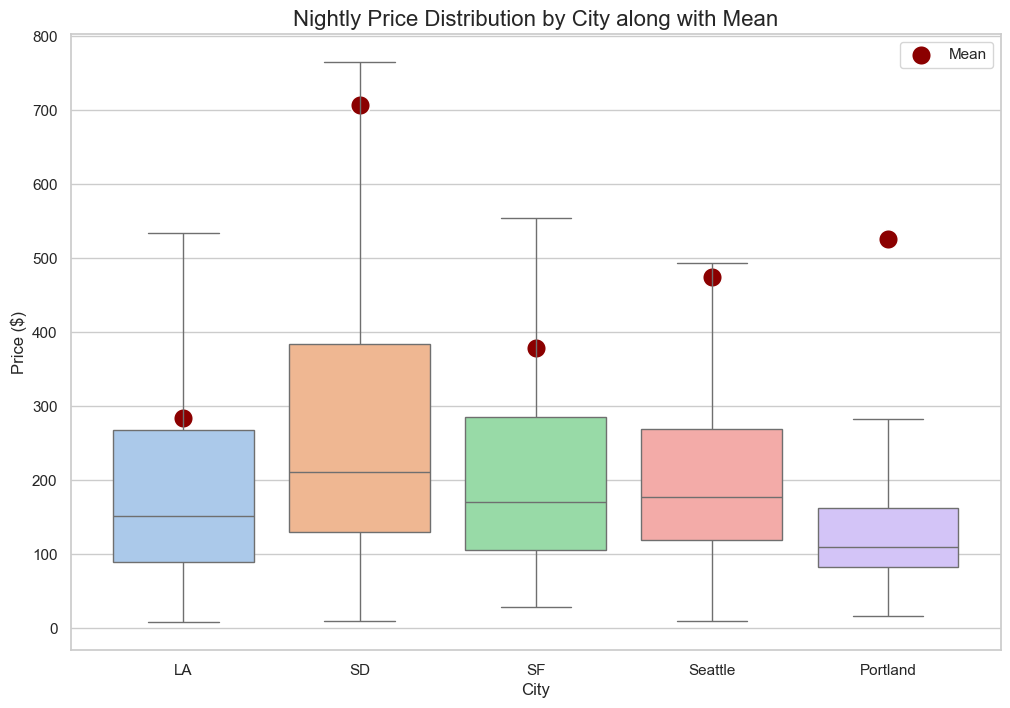

In [208]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
palette = sns.color_palette("pastel")

sns.boxplot(x='City', y='price', data=combined_df, showfliers=False, palette=palette)

city_means = combined_df.groupby('City')['price'].mean().reset_index()

sns.scatterplot(x='City', y='price', data=city_means, color='darkred', s=200, label='Mean')
plt.title('Nightly Price Distribution by City along with Mean', fontsize=16)
plt.ylabel('Price ($)', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.legend()
plt.show();

<b>Looking at this chart, we can interpret that our data is clearly skewed. For all cities, the average price (dark red dots) are far above the median and the upper whiskers are noticeably longer, indicating the presence of very expensive properties that pull the mean upward. Because these high-priced outliers distort the average, the median provides a better and more reliable measure of central tendency for comparing the nightly prices across cities.<b>


In [209]:
# Clean pricing data for Hypothesis 3
def clean_price(val):
  """Cleans string currency from $1200 format to floats."""
  if isinstance(val, str):
    clean_val = val.replace('$', '').replace(',', '')
    return float(clean_val)
  else:
    return val

combined_df['price'] = combined_df['price'].apply(clean_price)

In [210]:
# Preprocess data for Hypothesis 3

def preprocess_data(df):
  """Cleans data and groups rare property types."""
  df = df.copy()

  if df['price'].dtype == 'object':
    df['price'] = df['price'].apply(clean_price)

  fill_missing_values = ['review_scores_rating', 'bedrooms', 'accommodates']
  for col in fill_missing_values:
    df[col] = df[col].fillna(df[col].median())

  df = df.dropna(subset=['estimated_revenue_l365d', 'property_type'])

  type_counts = df['property_type'].value_counts(normalize=True)
  threshold = 0.015
  main_types = type_counts[type_counts > threshold].index
  df['property_group'] = df['property_type'].apply(lambda x: x if x in main_types else 'Other')
  print(f"\nProperty Grouping Completed. Categories: {df['property_type'].unique()}")

  return df

combined_df = preprocess_data(combined_df)
combined_df.head()


Property Grouping Completed. Categories: ['Private room in rental unit' 'Entire home' 'Entire rental unit'
 'Entire guesthouse' 'Private room in home' 'Entire bungalow'
 'Entire villa' 'Room in boutique hotel' 'Entire vacation home'
 'Entire guest suite' 'Private room in townhouse' 'Entire condo'
 'Farm stay' 'Entire townhouse' 'Entire loft' 'Entire cottage'
 'Private room in condo' 'Entire cabin' 'Private room in bungalow'
 'Private room in loft' 'Private room in cottage' 'Private room in hostel'
 'Room in hotel' 'Yurt' 'Private room in bed and breakfast'
 'Private room in guest suite' 'Shared room in home'
 'Shared room in hostel' 'Shipping container' 'Private room in guesthouse'
 'Entire place' 'Private room' 'Private room in villa' 'Tiny home'
 'Private room in serviced apartment' 'Shared room in guesthouse'
 'Private room in tent' 'Entire serviced apartment' 'Camper/RV'
 'Shared room in rental unit' 'Private room in earthen home' 'Dome'
 'Room in aparthotel' 'Private room in dome

,City,id,listing_url,name,description,neighborhood_overview,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,property_group
0,LA,2708,https://www.airbnb.com/rooms/2708,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",Run Runyon Canyon<br /><br />Gym & Sauna <br /...,"Walk and run to Runyon Canyon, it is open!<br ...",3008,Chas.,2008-09-16,within an hour,100%,100%,1,2.0,3.0,"['email', 'phone']",t,Neighborhood highlights,Hollywood,City of Los Angeles,34.09625,-118.34605,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Shared gym in building"", ""Paid washer \u2013...",81.0,NaN,t,26,56,86,361,45,2,0,116,4,120,9720.0,4.87,4.82,4.93,5.00,4.98,4.96,4.87,NaN,0,2,0,2,0,0.33,Los Angeles,Private room in rental unit
2,LA,6931,https://www.airbnb.com/rooms/6931,"RUN Runyon, Beau Furn Rms Terrace Hollyw Hill ...",Run Runyon Canyon & Views<br /><br />Gym & Sau...,We are in the middle of one of the great citie...,3008,Chas.,2008-09-16,within an hour,100%,100%,1,2.0,3.0,"['email', 'phone']",t,Neighborhood highlights,Hollywood,City of Los Angeles,34.09626,-118.34372,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Hot water kettle"", ""Coffee"", ""Dishes and sil...",88.0,NaN,t,18,30,30,291,37,3,0,46,3,180,15840.0,4.86,4.85,4.91,4.91,4.91,4.71,4.76,NaN,1,2,0,2,0,0.19,Los Angeles,Private room in rental unit
3,LA,8021,https://www.airbnb.com/rooms/8021,5-Star Beverly Hills Suite,"This private suite is in a huge, extraordinary...",I love this area because it's safe and conveni...,22460,Sherree Strong,2009-06-20,within an hour,100%,100%,0,1.0,1.0,"['email', 'phone']",t,Neighborhood highlights,Pico-Robertson,City of Los Angeles,34.06016,-118.37911,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,2.0,"[""Hot water kettle"", ""Self check-in"", ""Dishes ...",81.0,NaN,t,7,7,37,311,238,2,0,67,3,120,9720.0,4.83,4.90,4.82,4.86,4.87,4.92,4.84,HSR24-001423,0,1,0,1,0,1.21,Los Angeles,Private room in rental unit
4,LA,9376,https://www.airbnb.com/rooms/9376,"Bright Apt, walk to Venice Beach",One furnished bedroom available for short term...,NaN,30319,Cristina,2009-08-07,NaN,NaN,100%,0,2.0,2.0,"['email', 'phone', 'work_email']",t,NaN,Venice,City of Los Angeles,33.99782,-118.47698,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Dishes and silverware"", ""Iron"", ""Free street...",90.0,NaN,t,30,60,90,365,54,0,0,120,0,0,0.0,4.72,4.93,4.48,5.00,5.00,4.95,4.60,NaN,0,2,1,1,0,0.28,Los Angeles,Private room in rental unit
5,LA,98284,https://www.airbnb.com/rooms/98284,Beverly Hills private/ pool/ view,Stunning Beverly Hills Estate with Pool & Gues...,It's hard to believe this secluded Beverly Hil...,518902,Dan,2011-04-18,within an hour,100%,NaN,0,1.0,10.0,"['email', 'phone']",t,Neighborhood highlights,Sherman Oaks,City of Los Angeles,34.13258,-118.41202,Entire home,Entire home/apt,10,6.5,6.5 baths,6.0,6.0,"[""Iron"", ""Dryer"", ""Hammock"", ""Pool - pool toys...",1520.0,NaN,t,28,58,88,363,52,0,0,119,0,0,0.0,4.96,4.92,4.81,4.98,4.96,4.79,4.83,HSR25-001653,

# **Testing Hypothesis 1: How can AirBnB hosts increase their revenue?**



---



**Key question:** How can Airbnb hosts increase their revenue?

* **H₀ (Null Hypothesis):** There is no significant relationship between pricing, availability, reviews, responsiveness, and revenue.

* **H₁ (Alternative Hypothesis):** There is a significant relationship between pricing, availability, reviews, responsiveness, and revenue.

## 1.a Understanding average nightly prices of AirBnB accross different cities

#### Scatterplot (Data Visualization Technique)


 Average Price and Accommodates/AirBnB size by City:
       City  Median_price  Average_Accommodates
4  Portland         110.0                  3.62
0        LA         152.0                  3.94
2        SF         170.0                  3.23
3   Seattle         177.0                  4.08
1        SD         211.0                  5.08


The correlation between the no. of guests an AirBnB accommodates vs price is 0.66936035942644




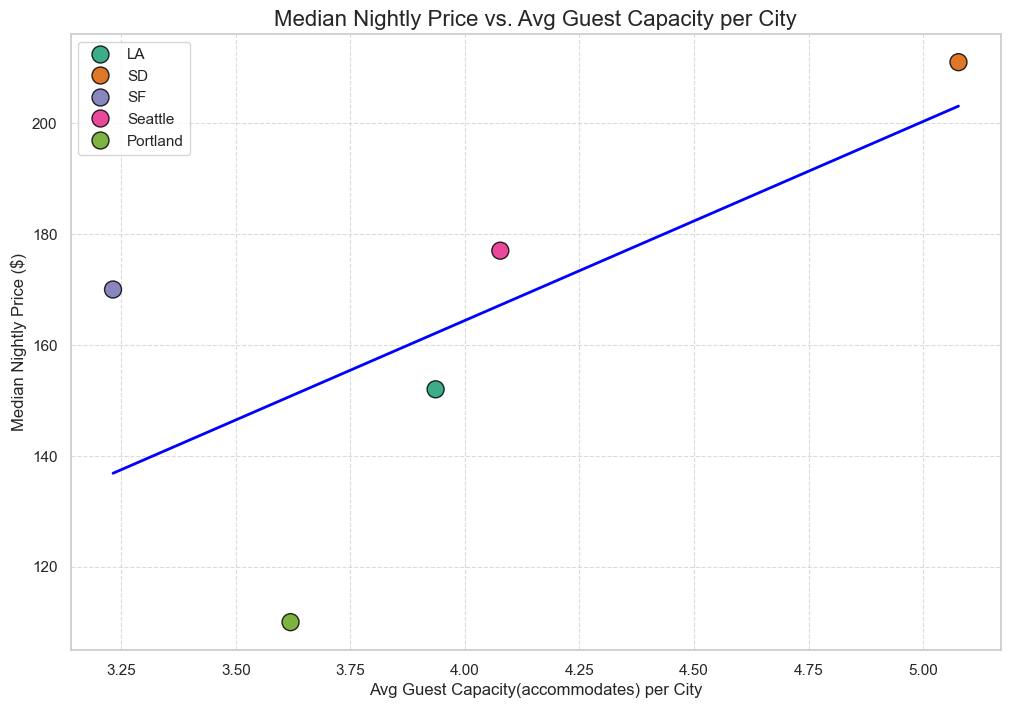

In [211]:
city_data_list = []
for name, df in cities_dict.items():
  Median_price = df['price'].median()
  avg_accommodates_val = df['accommodates'].mean()
  city_data_list.append({'City': name, 'Median_price': Median_price, 'Average_Accommodates': avg_accommodates_val})

avg_accommodates_df = pd.DataFrame(city_data_list)
print(f"\n Average Price and Accommodates/AirBnB size by City:")
print(avg_accommodates_df.round(2).sort_values(by='Median_price'))

print('\n')
print(f"The correlation between the no. of guests an AirBnB accommodates vs price is {avg_accommodates_df['Median_price'].\
                                                                                     corr(avg_accommodates_df['Average_Accommodates'])}")
print('\n')

plt.figure(figsize=(12,8))
palette = sns.color_palette("Dark2", n_colors=len(avg_accommodates_df))
sns.scatterplot(x='Average_Accommodates', y='Median_price', data=avg_accommodates_df, s=150, hue='City', palette=palette, edgecolor='black', alpha=0.85)

sns.regplot(x='Average_Accommodates', y='Median_price', data=avg_accommodates_df, ci=None, scatter=False, color='blue', \
            line_kws={'lw':2, 'label': 'Trend line'})

plt.title('Median Nightly Price vs. Avg Guest Capacity per City', fontsize=16)
plt.xlabel('Avg Guest Capacity(accommodates) per City', fontsize=12)
plt.ylabel('Median Nightly Price ($)', fontsize=12)
ax = plt.gca()
ax.grid(True, linestyle='--', linewidth=0.8, alpha=0.7)
plt.legend()
plt.show();

##### Analysis and Insights

As we might naturally expect, there is a moderate-to-strong positive correlation between the average nightly price of Airbnb listings and the number of guests they can accommodate. The correlation coefficient of 0.66 indicates that larger listings generally command higher prices. However, this relationship is not perfect, indicating that guest capacity alone does not fully determine pricing.

This nuance is particularly important for new Airbnb hosts: even smaller listings can still achieve high revenue by offering attractive amenities, strategically considering seasonality, earning superhost status, and incorporating other value-added features. Factors such as neighborhood and location, property type, host reputation, and availability of instant booking also play a significant role in influencing nightly rates.

Therefore, while accommodating more guests tends to increase price, it is only one of several factors affecting revenue, and listings with similar capacities can still vary considerably in price.

We will look at some other features affecting price and revenue in the upcoming analysis.

#### Bar Plot (Data Visualization Technique)

Comparing Average Estimated Revenue per Airbnb Listing Across West Coast:

,City,Mean_Estimated_Revenue,Number_of_Listings,Total_Estimated_Revenue,Total_Estimated_Revenue_Millions
0,LA,12842.22,18089,232302968.0,232.30
1,Portland,18811.74,3798,71446974.0,71.45
2,SD,27727.83,11604,321753779.0,321.75
3,SF,21441.93,5795,124255960.0,124.26
4,Seattle,23163.73,6227,144240552.0,144.24


/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/2020817874.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Total_Estimated_Revenue_Millions', data=city_stats, palette='magma')


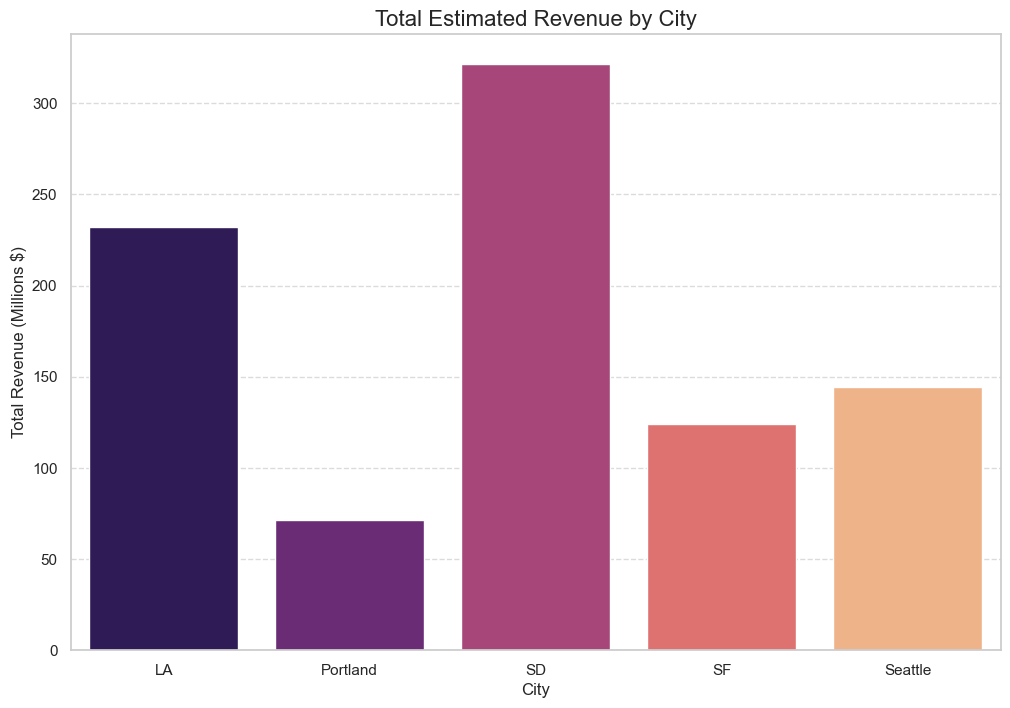

/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/2020817874.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Mean_Estimated_Revenue', data=city_stats, palette='viridis')


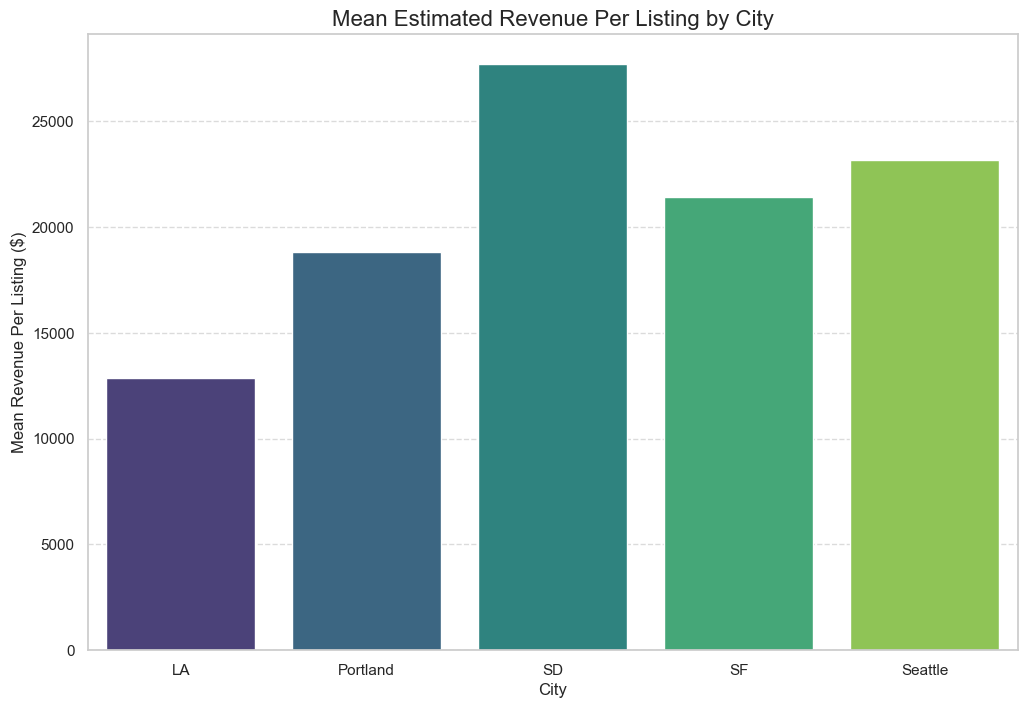

In [212]:
city_stats = combined_df.groupby('City').agg(
    Mean_Estimated_Revenue=('estimated_revenue_l365d', 'mean'),
    Number_of_Listings=('id', 'count'),
    Total_Estimated_Revenue = ('estimated_revenue_l365d', 'sum')
).reset_index()

# Converting Total_Estimated_Revenue to millions
city_stats['Total_Estimated_Revenue_Millions'] = city_stats['Total_Estimated_Revenue'] / 1_000_000

display(city_stats.round(2))

plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Total_Estimated_Revenue_Millions', data=city_stats, palette='magma')
plt.title('Total Estimated Revenue by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Revenue (Millions $)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Mean_Estimated_Revenue', data=city_stats, palette='viridis')
plt.title('Mean Estimated Revenue Per Listing by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Mean Revenue Per Listing ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

##### Analysis and Insights

The "Mean Estimated Revenue Per Listing" highlights the average revenue (and thus profitability) of individual Airbnb properties in each city. While Los Angeles and San Diego are estimated to generate the highest total revenues of approximately $230M and $350M+ due to their large number of listings and status as top tourist destinations, this primarily benefits the company and toursits since they get competitive pricing advantage. In contrast, Portland and Seattle achieve higher average revenue per listing as compared to LA around $18,000/yr and $22,500/yr respectively indicating more lucrative opportunities for individual hosts. San Diego also leads in per-listing revenue with over $25,500/yr. This metric helps differentiate between a large market and a truly profitable market, providing valuable guidance for both new and existing hosts when choosing locations. However, it is important to also consider other macro- and microeconomic factors, such as tourist behavior and preferences, when drawing conclusions.

#### Bar Plot 2 (Data Visualization Technique)

Does location role in deciding average nightly prices?

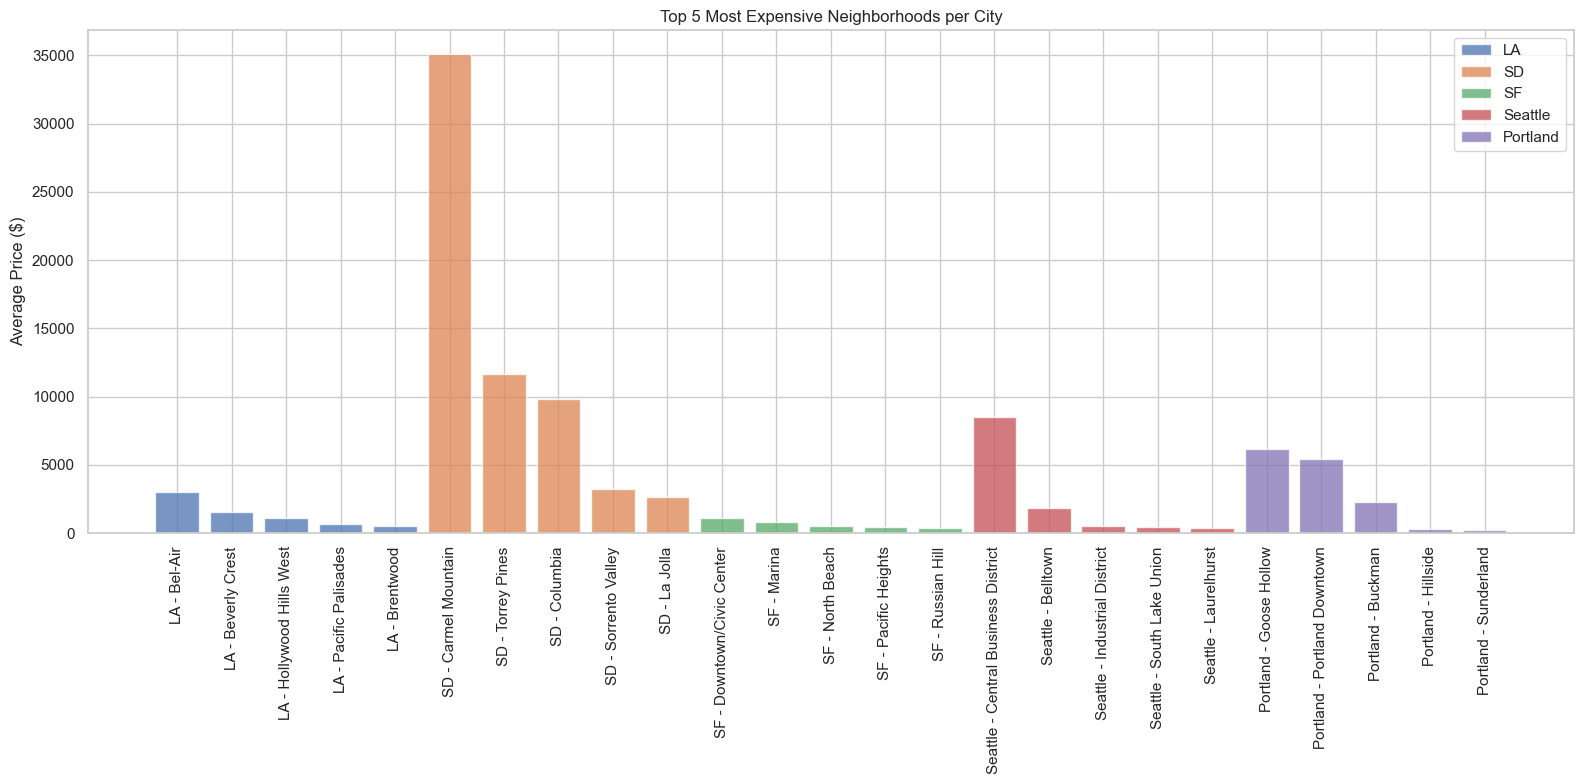

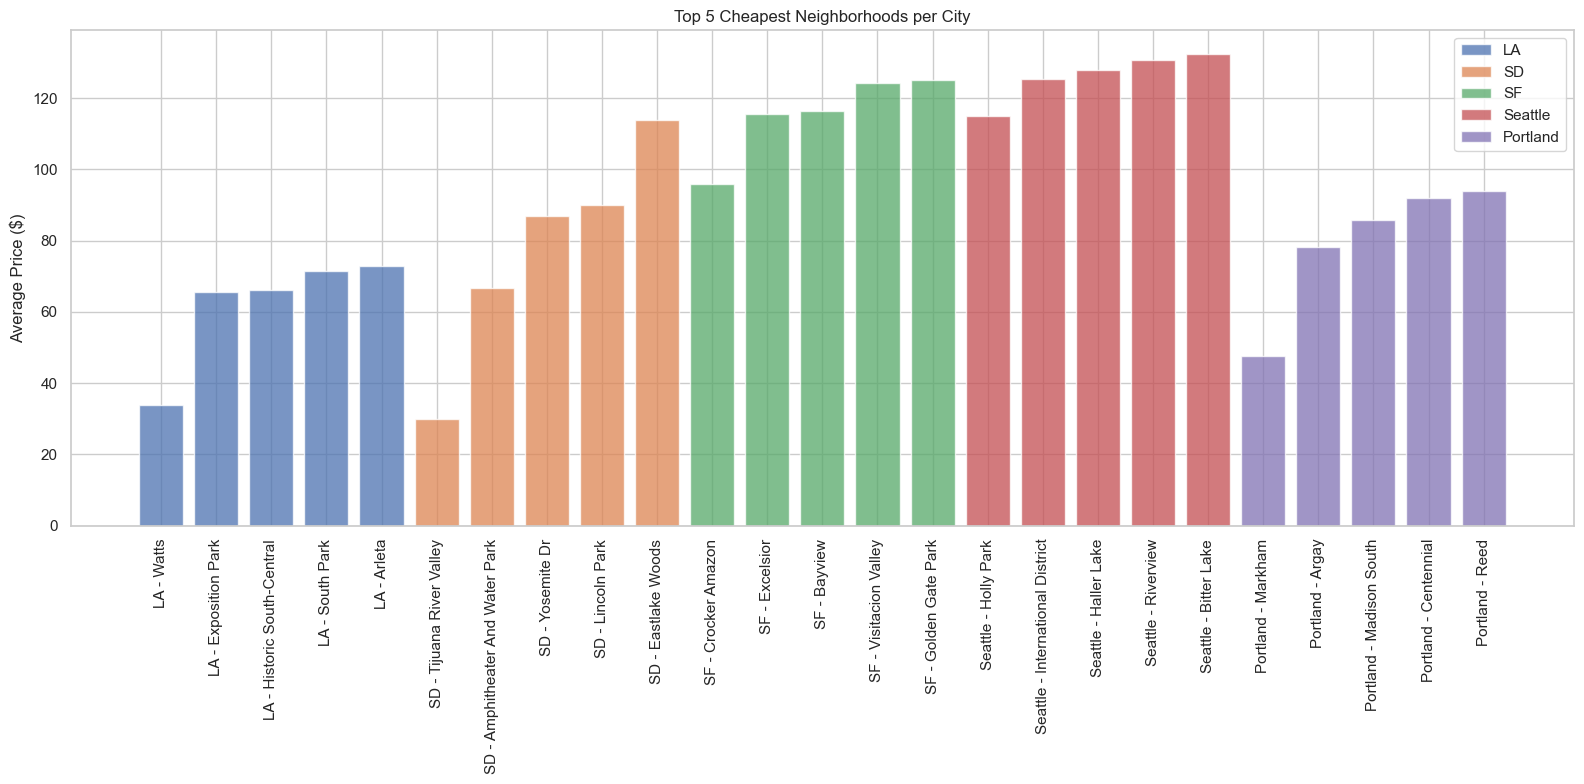

In [213]:
def get_neighborhood_prices(df, city_name, n=5, largest=True):
    if largest:
        temp = df.groupby("neighbourhood_cleansed")["price"].mean().nlargest(n).reset_index()
    else:
        temp = df.groupby("neighbourhood_cleansed")["price"].mean().nsmallest(n).reset_index()
    temp["city"] = city_name
    temp["label"] = city_name + " - " + temp["neighbourhood_cleansed"]
    return temp

def plot_neighborhoods(df_to_plot, title):
    fig, ax = plt.subplots(figsize=(16, 8))
    for city in df_to_plot["city"].unique():
        data = df_to_plot[df_to_plot["city"] == city]
        ax.bar(
            data["label"],
            data["price"],
            alpha=0.75,
            label=city
        )
    ax.set_xticks(range(len(df_to_plot["label"])))
    ax.set_xticklabels(df_to_plot["label"], rotation=90)
    ax.set_ylabel("Average Price ($)")
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    display(fig)
    plt.close(fig)


top5 = []
cheapest5 = []
for city_name, df in cities_dict.items():
    top5.append(get_neighborhood_prices(df, city_name, largest=True))
    cheapest5.append(get_neighborhood_prices(df, city_name, largest=False))

top5_df = pd.concat(top5)
cheapest5_df = pd.concat(cheapest5)


plot_neighborhoods(top5_df, "Top 5 Most Expensive Neighborhoods per City")
plot_neighborhoods(cheapest5_df, "Top 5 Cheapest Neighborhoods per City")

##### Analysis and Insights

The graphs above show the top 5 most expensive neighbourhoods and the top 5 cheapest neighbourhoods accross top west coast markets and their average nightly prices.

San Diego stands out as a city with high Airbnb prices across the board. It not only has some of the most expensive neighborhoods but also the priciest among the cheapest neighborhoods, explaining why the city’s average and median nightly price is the highest.

To most of our surprise, Los Angeles ranks among one of the more affordable cities, with an average nightly price of $283.65. This may be due to higher number of Aibnb's, smaller AibnB's or other factors which we will explore later.

So, when deciding on an AirBnB selection as a host or as a guest, neighborhood and its location does play a very important role.

#### Descriptive Statistics + Correlation Analysis + Scatterplot Visualization

Does neighbourhood density play a role in deciding average nightly prices?
Does having more listings tend to be associated with higher or lower average prices?

Correlation between avg price and number of listings in LA: 0.09
Correlation between avg price and number of listings in SD: -0.04
Correlation between avg price and number of listings in SF: 0.20
Correlation between avg price and number of listings in Seattle: 0.30
Correlation between avg price and number of listings in Portland: 0.06
Overall correlation between average price and number of listings per neighborhood: -0.02


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='listing_count', ylabel='avg_price'>

<Axes: xlabel='listing_count', ylabel='avg_price'>

Text(0.5, 0, 'Number of Listings in Neighborhood')

Text(0, 0.5, 'Median Price ($)')

Text(0.5, 1.0, 'Median Price vs Number of Listings per Neighborhood (Excluding Outliers)')

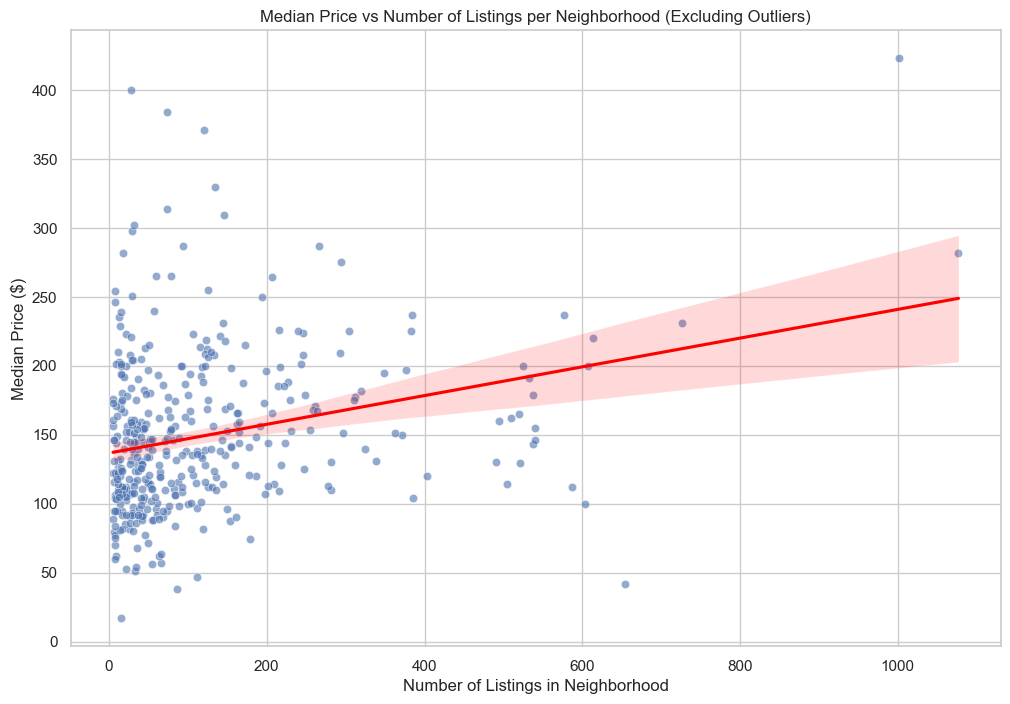

Correlation after removing extreme outliers: 0.27


In [214]:
MIN_LISTINGS = 5

def get_neighborhood_stats(df, city_name):
    temp = df.groupby("neighbourhood_cleansed").agg(
        avg_price=('price', 'median'),
        listing_count=('id', 'count')
    ).reset_index()


    temp = temp[temp['listing_count'] >= MIN_LISTINGS]

    temp["city"] = city_name
    return temp


neighborhood_stats_list = []
for city_name, df in cities_dict.items():
    neighborhood_stats_list.append(get_neighborhood_stats(df, city_name))


neighborhood_stats = pd.concat(neighborhood_stats_list, ignore_index=True)

for city in neighborhood_stats['city'].unique():
    city_df = neighborhood_stats[neighborhood_stats['city'] == city]
    corr = city_df['avg_price'].corr(city_df['listing_count'])
    print(f"Correlation between avg price and number of listings in {city}: {corr:.2f}")


overall_corr = neighborhood_stats['avg_price'].corr(neighborhood_stats['listing_count'])
print(f"Overall correlation between average price and number of listings per neighborhood: {overall_corr:.2f}")


listing_thresh = neighborhood_stats['listing_count'].quantile(0.99)
price_thresh = neighborhood_stats['avg_price'].quantile(0.99)

filtered_stats = neighborhood_stats[
    (neighborhood_stats['listing_count'] <= listing_thresh) &
    (neighborhood_stats['avg_price'] <= price_thresh)
]


plt.figure(figsize=(12,8))
sns.scatterplot(x='listing_count', y='avg_price', data=filtered_stats, alpha=0.6)
sns.regplot(x='listing_count', y='avg_price', data=filtered_stats, scatter=False, color='red', lowess=False)
plt.xlabel("Number of Listings in Neighborhood")
plt.ylabel("Median Price ($)")
plt.title("Median Price vs Number of Listings per Neighborhood (Excluding Outliers)")
plt.show()


overall_corr_filtered = filtered_stats['avg_price'].corr(filtered_stats['listing_count'])
print(f"Correlation after removing extreme outliers: {overall_corr_filtered:.2f}")

##### Analysis and Insights

There is a weak positive correlation (r = 0.27) between neighborhood listing density and median nightly price across all cities, suggesting that density has little impact on price. At the city level, most cities show no significant correlation, although Seattle and San Francisco show slightly better correlations of 0.3 and 0.2, respectively. This could be because even dense neighborhoods often contain a mix of budget and luxury listings, which balances out prices, or due to market saturation, where high density does not necessarily drive prices up and competition among hosts keeps rates moderate.

#### Scatterplot (Data Visualization Technique)

Average Price Across Availability Groups



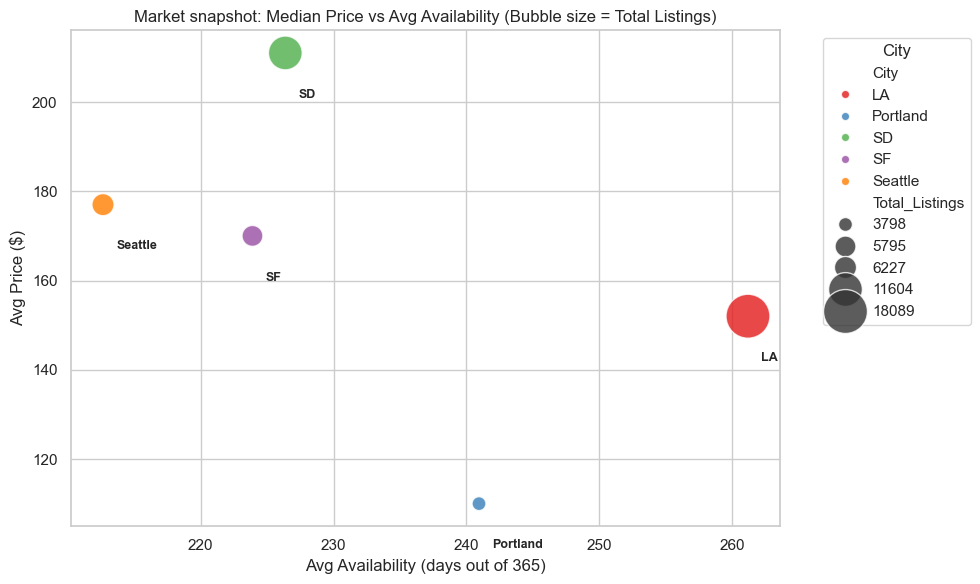

In [215]:
city_summary_df = combined_df.groupby('City').agg(Avg_Price=('price', 'median'),\
    Avg_Availability_365=('availability_365', 'mean'), Total_Listings=('id', 'count')).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=city_summary_df, x='Avg_Availability_365', y='Avg_Price', size='Total_Listings', sizes=(100,1000), \
                hue='City', palette='Set1', alpha=0.8)

for i in range(len(city_summary_df)):
  plt.text(
      city_summary_df['Avg_Availability_365'].iloc[i] + 1,
      city_summary_df['Avg_Price'].iloc[i] - 10,
      city_summary_df['City'].iloc[i],
      fontsize=9, weight='bold'
  )

plt.title('Market snapshot: Median Price vs Avg Availability (Bubble size = Total Listings)')
plt.xlabel('Avg Availability (days out of 365)')
plt.ylabel('Avg Price ($)')
plt.legend(title ='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show();

## 1.b What is the relationship between reviews and listing prices in each city?


#### Scatterplot (Data Visualization Technique)



Price vs Review Score Rating: 0.067
Rating vs Cleanliness: 0.793

LA:
Price vs Review Score Rating: 0.082
Rating vs Cleanliness: 0.809

SD:
Price vs Review Score Rating: 0.071
Rating vs Cleanliness: 0.795

SF:
Price vs Review Score Rating: 0.107
Rating vs Cleanliness: 0.720

Seattle:
Price vs Review Score Rating: 0.105
Rating vs Cleanliness: 0.808

Portland:
Price vs Review Score Rating: -0.048
Rating vs Cleanliness: 0.758


<Axes: xlabel='review_scores_rating', ylabel='price'>

<Axes: xlabel='review_scores_rating', ylabel='price'>

Text(0.5, 1.0, 'Price vs Review Score Rating (Outliers Removed)')

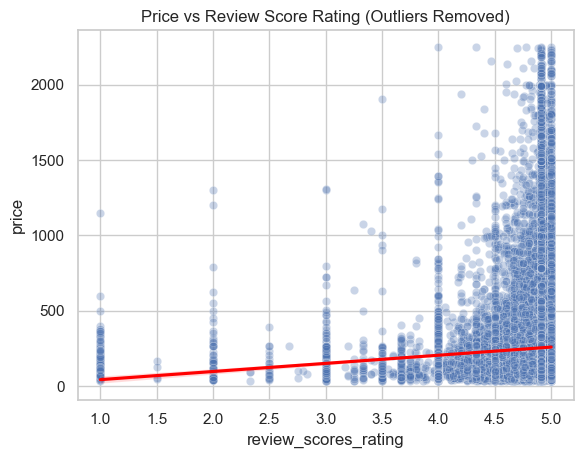

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     322.4
Date:                Fri, 05 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:49:47   Log-Likelihood:            -3.1076e+05
No. Observations:               44610   AIC:                         6.215e+05
Df Residuals:                   44603   BIC:                         6.216e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -30.5839 

In [216]:
price_low, price_high = combined_df['price'].quantile([0.01, 0.99])
df_filtered = combined_df[combined_df['price'].between(price_low, price_high)].copy()


#as review scores increase, does price tend to increase?
corr_rating = df_filtered['price'].corr(df_filtered['review_scores_rating'])

#as review_scores_cleanliness increase, does price tend to increase?
corr_cleanliness = df_filtered['review_scores_rating'].corr(df_filtered['review_scores_cleanliness'])

print('\n')
print(f"Price vs Review Score Rating: {corr_rating:.3f}")
print(f"Rating vs Cleanliness: {corr_cleanliness:.3f}")


for city_name, df_city in cities_dict.items():
    df_city_filtered = df_city[df_city['price'].between(price_low, price_high)].copy()

    corr_rating = df_city_filtered['price'].corr(df_city_filtered['review_scores_rating'])
    corr_cleanliness = df_city_filtered['review_scores_rating'].corr(df_city_filtered['review_scores_cleanliness'])

    print(f"\n{city_name}:")
    print(f"Price vs Review Score Rating: {corr_rating:.3f}")
    print(f"Rating vs Cleanliness: {corr_cleanliness:.3f}")



sns.scatterplot(data=df_filtered, x='review_scores_rating', y='price', alpha=0.3)
sns.regplot(data=df_filtered, x='review_scores_rating', y='price', scatter=False, color='red')
plt.title("Price vs Review Score Rating (Outliers Removed)")
plt.show();


model = smf.ols("price ~ number_of_reviews + review_scores_rating + C(City)", data=df_filtered).fit()
print(model.summary())


##### Analysis and Insights

This is analyzing how Airbnb listing prices relate to review quality using listing-level data across multiple cities (excluding extreme price outliers).

The results show that price has a very weak positive correlation with review score (r ≈ 0.072).

Regression analysis indicates that a 1-point increase in review score is associated with an increase of about $54 in price.

Overall, higher-rated listings can charge slightly higher prices, but location and property characteristics are the main drivers of pricing, which we will analyze in the following sections of our project.

Airbnb hosts can improve revenue by focusing on factors that enhance review scores—especially cleanliness and amenities—while also considering the property’s location and features when setting prices.

## 1.c Are there city-specific patterns in host responsiveness and superhost status that impact revenue?

In [217]:

LA.groupby(by =['host_is_superhost'])['price'].mean()
SD.groupby(by =['host_is_superhost'])['price'].mean()
SF.groupby(by =['host_is_superhost'])['price'].mean()
Portland.groupby(by =['host_is_superhost'])['price'].mean()
Seattle.groupby(by =['host_is_superhost'])['price'].mean()

host_is_superhost
0    295.065716
1    267.805387
Name: price, dtype: float64

host_is_superhost
0    1094.312997
1     337.769205
Name: price, dtype: float64

host_is_superhost
0    435.041382
1    315.746148
Name: price, dtype: float64

host_is_superhost
0    1111.450667
1     144.442994
Name: price, dtype: float64

host_is_superhost
0    766.342532
1    219.227163
Name: price, dtype: float64

In [218]:
# an overview of superhosts:
superhost_LA = (LA['host_is_superhost'].sum()/ len(LA)) * 100
superhost_SD = (SD['host_is_superhost'].sum()/ len(SD)) * 100
superhost_SF = (SF['host_is_superhost'].sum()/ len(SF)) * 100
superhost_Seattle = (Seattle['host_is_superhost'].sum()/ len(Seattle)) * 100
superhost_Portland = (Portland['host_is_superhost'].sum()/ len(Portland)) * 100
print(f"Percentage of superhosts in LA: {superhost_LA:.2f} %")
print(f"Percentage of superhosts in SD: {superhost_SD:.2f} %")
print(f"Percentage of superhosts in SF: {superhost_SF:.2f} %")
print(f"Percentage of superhosts in Seattle: {superhost_Seattle:.2f} %")
print(f"Percentage of superhosts in Portland: {superhost_Portland:.2f} %")

Percentage of superhosts in LA: 35.92 %
Percentage of superhosts in SD: 49.19 %
Percentage of superhosts in SF: 42.61 %
Percentage of superhosts in Seattle: 52.27 %
Percentage of superhosts in Portland: 56.70 %


In [219]:
#  average revenue scores by city
LA_avg_revenue = LA['estimated_revenue_l365d'].mean()
SD_avg_revenue= SD['estimated_revenue_l365d'].mean()
SF_avg_revenue = SF['estimated_revenue_l365d'].mean()
Seattle_avg_revenue = Seattle['estimated_revenue_l365d'].mean()
Portland_avg_revenue = Portland['estimated_revenue_l365d'].mean()
print(f"Average estimated revenue in LA: {LA_avg_revenue}")
print(f"Average estimated revenue in SD: {SD_avg_revenue}")
print(f"Average estimated revenue in SF: {SF_avg_revenue}")
print(f"Average estimated revenue in Seattle: {Seattle_avg_revenue}")
print(f"Average estimated revenue in Portland: {Portland_avg_revenue}")

Average estimated revenue in LA: 12842.222787329316
Average estimated revenue in SD: 27727.833419510513
Average estimated revenue in SF: 21441.925798101813
Average estimated revenue in Seattle: 23163.730849526255
Average estimated revenue in Portland: 18811.73617693523


In [220]:
# coverting host_response_rate to numeric before binning
combined_df['host_response_rate'] = (
    combined_df['host_response_rate'].astype(str)
    .str.replace('%', '', regex=False)
    .replace('nan', np.nan) # Replace string 'nan' with actual NaN
    .astype(float)
)

# binning host response rate
combined_df['response_speed'] = pd.cut(
    combined_df['host_response_rate'],
    bins=[0, 25, 50, 75, 99, 100],
    labels=['rarely','sometimes', 'frequently', 'almost always', 'always'],
    include_lowest=True
)

In [221]:
# overview of response speed:
print("\nResponse speed distribution per city:")
print(combined_df.groupby(by=['City','response_speed'])['response_speed'].count())
combined_df['response_speed'].value_counts()


Response speed distribution per city:
City      response_speed
LA        rarely              561
          sometimes           278
          frequently          295
          almost always      2857
          always            11471
Portland  rarely               49
          sometimes            17
          frequently           30
          almost always       358
          always             2992
SD        rarely              133
          sometimes            76
          frequently          187
          almost always      1447
          always             8258
SF        rarely               82
          sometimes            56
          frequently          122
          almost always       813
          always             4284
Seattle   rarely               74
          sometimes            34
          frequently           76
          almost always      1010
          always             4348
Name: response_speed, dtype: int64


/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/3439341758.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(combined_df.groupby(by=['City','response_speed'])['response_speed'].count())


response_speed
always           31353
almost always     6485
rarely             899
frequently         710
sometimes          461
Name: count, dtype: int64

In [222]:
# heatmaps of reviews
gr_revenue = combined_df.groupby(by =['City', 'response_speed'])['estimated_revenue_l365d'].mean()
sns.heatmap(data = gr_revenue.unstack(), cmap= 'Reds', annot = True)

/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/2842661131.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr_revenue = combined_df.groupby(by =['City', 'response_speed'])['estimated_revenue_l365d'].mean()


<Axes: xlabel='response_speed', ylabel='City'>

/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/4255356474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'response_speed', y = 'estimated_revenue_l365d', data = combined_df, kind = 'bar', palette='flare')


Text(0.5, 1.0, 'Estimated revenue by Host Response Speed')

Text(0.5, 33.203125, 'Host response Speed')

Text(61.876953125000014, 0.5, 'Estimated revenue')

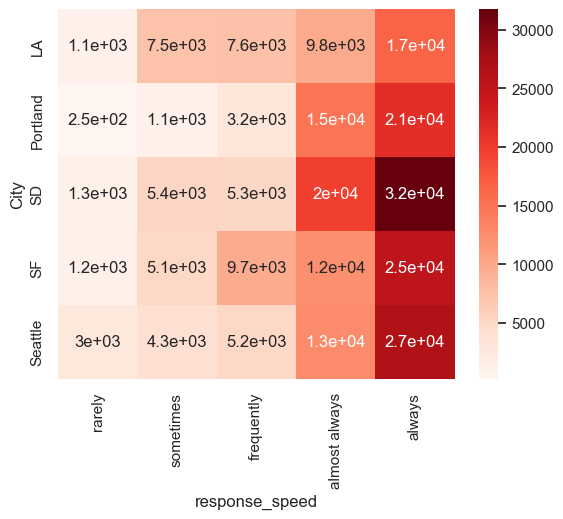

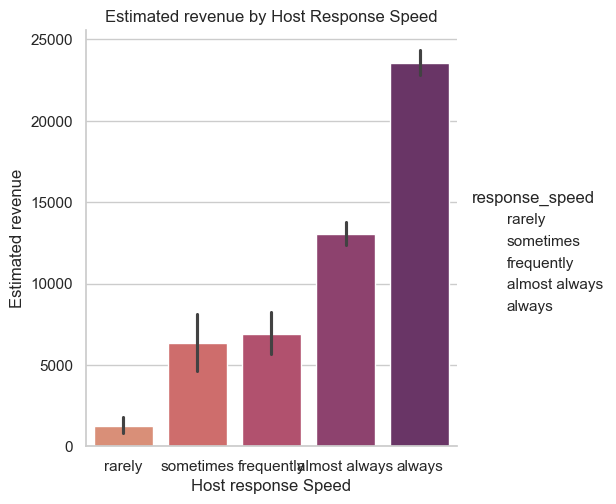

/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/4255356474.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'host_is_superhost', y = 'estimated_revenue_l365d', data = combined_df, kind = 'bar', palette='flare')


Text(0.5, 1.0, 'Estimated Revenue by Superhost Status')

Text(0.5, 12.44444444444443, 'Superhost Status')

Text(-8.805555555555555, 0.5, 'Estimated Revenue')

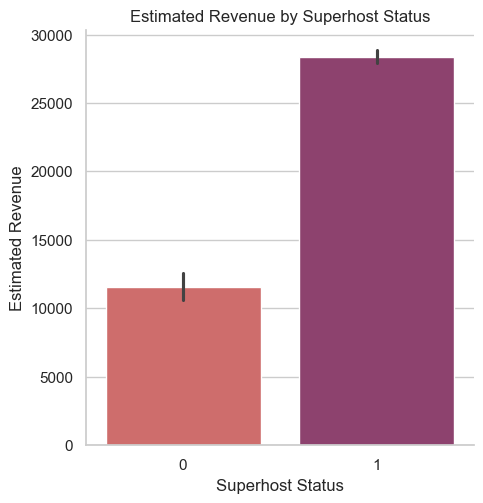

Text(0.5, 1.0, 'Estimated revenue by City (Superhost vs Non-Superhost)')

Text(61.16271701388891, 0.5, 'Estimated Revenue')

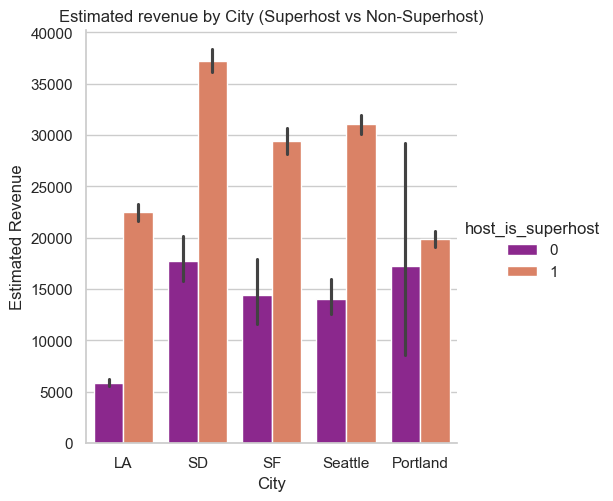

In [223]:
# catplots
# Plot 1: Estimated revenue by response speed
sns.catplot(x = 'response_speed', y = 'estimated_revenue_l365d', data = combined_df, kind = 'bar', palette='flare')
plt.title('Estimated revenue by Host Response Speed')
plt.xlabel('Host response Speed')
plt.ylabel('Estimated revenue')
plt.show()

# Plot 2: Estimated revenue by superhost satus
sns.catplot(x = 'host_is_superhost', y = 'estimated_revenue_l365d', data = combined_df, kind = 'bar', palette='flare')
plt.title('Estimated Revenue by Superhost Status')
plt.xlabel('Superhost Status')
plt.ylabel('Estimated Revenue')
plt.show()
# Plot 2: Review scores by city, comparing superhosts vs non-superhosts
sns.catplot(x = 'City', y = 'estimated_revenue_l365d', data = combined_df, hue = 'host_is_superhost', kind = 'bar', palette='plasma')
plt.title('Estimated revenue by City (Superhost vs Non-Superhost)')
plt.ylabel('Estimated Revenue')
plt.show()

##### Analysis and Insights

This is breaking down distribution of superhosts in each city, how quickly the host responds in each city, and estimated revenue and how these all interact with one another.

Portland has the highest amount of superhosts at 56.7% However, they have one of the lower average estimated revenue. San Diego has the highest average estimated revenue of around $27,727.

We see in each city, significantly more hosts typtically always respond. This means the hosts have a 99-100% response rate.

When we analyze how these factors interact directly with revenue, we found that:

1.) Hosts who always respond see a greater average amount of estimated revenue than those who rarely respond. However, San Diego and Seattle have a greater overall average estimated revenue in each response categorey in comparison to the other cities.

2.) Superhosts have much higher average estimated revenue than non-Superhosts. When we breakdown superhosts by city, we the highest amount in revenue are superhosts whose listing is in San Diego. Secondly, superhosts in Seattle have higher revenue.


For Airbnb hosts, always or almost always responding (responding 75-100% of the time) will lead to higher revenue. Additionaly, hosts who have superhosts status will always see an overall greater average revenue. In each city, hosts with a quick response time and superhost status will lead to higher revenue, but particullary those in San Diego and closely behind Seattle.


## <b>Hypothesis 1 Conclusion: Findings and Managerial Insights

---



We have analyzed a wide variety of factors that affect average nightly price and revenue for different AirBnB listings in our first hypothesis.


**1. Average Revnue and Nightly Prices in different cities on the West Coast**

---

* We have analyzed relationships between "Total Estimated Revenue by City" and compared it ot "Mean Estimated Revenue Per Listing by City" using bar charts.

* Our analysis suggest that Big markets ≠ most profitable and that the  per-listing revenue is a better metric for individual hosts. For example, Los Angeles and San Diego have the highest total revenue driven by large volume of listings and tourist footfall, which primarily benefits the company and toursits due to competitive pricing advantage. However, San Francisco, Seattle and San Diego are more lucrative markets for hosts.

**Is the size of the AirBnB or Average Guest Capacity the only driver of nightly price?**

---

* We plotted a scatter plot with correlation line to analyze the trend in guest capacity and median nightly price.
* There’s a moderate to strong positive correlation (r = 0.66) between the average number of guests AirBnB in different cities can accomodate vs average nightly price, meaning larger listings generally charge more. But the correlation isn’t perfect and smaller listings can still charge higher depending on location, amenities they offer, or by active hosting or adding other value-enhancing features.

**Does neighborhood density affect nightly prices?**

---

* We plotted a combination of scatter and regplot to analyze the relationship between neighborhood density on nightly prices.
* Neighborhood density (number of active listings in the neighborhood) shows a weak positive correlation with price (r = 0.27). Denser areas have slightly higher rates, but it’s not a major price driver.


**Is there a relationship between Reviews and Nightly prices?**

---

* We analyzed person correlation to get a quick intutive look at this relationship. This gave us a high level overview of the relationship. There is a very weak correlation between review scores and nightly prices.

* This analysis was followed by OLS regression, which allows us to see the independent effect of reviews while controlling for other factors like city, number of reviews, etc. The regression analysis showed that reviews explain only about 5% of price variability, and for every 1-point increase in review score the host can charge a slight price premium of $54. This confirmed that while reviews have a small positive effect on price, location and other factors matter much more-for example, a listing in San Diego costs far more than a similar listing in Portland, regardless of review scores.

**Responsiveness and Superhosts**

---

* We designed a heatmap broken down by response speed and city to analyze this relationship.
* Our analysis suggests, faster response-speed buckets consistently show higher revenues across cities.
* Superhosts earn more on average than non-Superhosts in every city.


**Hypothesis Outcome**

---

Based on our analysis, we see that there is a relationship between price, availability, reviews, host responsiveness and revenue, so we rejected the null hypothesis.

**Managerial Recommendations**
---


**For Hosts**

* Consider markets in Seattle, San Diego and San Francisco for stronger per-listing revenue potential.
* Maintain very high response rates (99–100%) to maximize revenue.
* Obtain Superhost status
* Focus on rating quality (especially cleanliness and communication) to justify small price premiums.

**For Airbnb**

* Reward fast response rates and Superhost status in search rankings.
* Provide city-specific pricing guidance to new hosts.

# **Testing Hypothesis 2: Is there a correlation between the number of amenity types and review scores?**

**Key question:** Does offering more (and the right mix of) amenity types actually improve ratings?

* **H₀ (Null Hypothesis):** There is no significant relationship between the number of amenity types offered and the review scores of Airbnb listings.

* **H₁ (Alternative Hypothesis):** Listings with a greater number of amenity types have significantly higher review scores than listings with fewer amenity types.

## Data Setup for Hypothesis Test

In [224]:
# Ensure amenities is a string and lowercase
combined_df["amenities"] = combined_df["amenities"].fillna("").astype(str).str.lower()

In [225]:
# Define amenity categories (keywords all lowercase)
amenity_categories = {
    "amenity_comfort": [
        "air conditioning", "ac", "heating", "hot water",
        "extra pillows", "extra blankets", "washer", "dryer"
    ],
    "amenity_luxury": [
        "hot tub", "pool", "sauna", "fireplace",
        "jacuzzi", "spa", "waterfront", "gym", "fitness center"
    ],
    "amenity_business": [
        "wifi", "wi-fi", "wireless internet", "ethernet",
        "dedicated workspace", "desk", "monitor", "printer"
    ],
    "amenity_safety": [
        "smoke alarm", "smoke detector",
        "carbon monoxide alarm", "carbon monoxide detector",
        "first aid kit", "fire extinguisher"
    ],
    "amenity_kitchen": [
        "kitchen", "refrigerator", "microwave", "stove",
        "oven", "dishwasher", "coffee maker", "cooking basics"
    ],
    "amenity_outdoor": [
        "patio", "balcony", "terrace", "bbq grill", "barbecue",
        "garden", "backyard", "outdoor seating"
    ]
}

def has_any_amenity(amenities_str, keywords):
    """Return 1 if any keyword appears in the amenities string, else 0."""
    if not amenities_str:
        return 0
    return int(any(k in amenities_str for k in keywords))

In [226]:
# Create one binary column per category
for col_name, keywords in amenity_categories.items():
    combined_df[col_name] = combined_df["amenities"].apply(lambda x: has_any_amenity(x, keywords))

In [227]:
# Count how many categories each listing satisfies (0–6)
category_cols = list(amenity_categories.keys())
combined_df["amenity_category_count"] = combined_df[category_cols].sum(axis=1)

In [228]:
# Keep only rows with a valid review score
amen_df = combined_df[~combined_df["review_scores_rating"].isna()].copy()

amen_df[["city", "review_scores_rating", "amenity_category_count"] + category_cols].head()

,city,review_scores_rating,amenity_category_count,amenity_comfort,amenity_luxury,amenity_business,amenity_safety,amenity_kitchen,amenity_outdoor
0,Los Angeles,4.87,6,1,1,1,1,1,1
2,Los Angeles,4.86,6,1,1,1,1,1,1
3,Los Angeles,4.83,6,1,1,1,1,1,1
4,Los Angeles,4.72,5,1,1,1,1,1,0
5,Los Angeles,4.96,6,1,1,1,1,1,1


Create summary table & buckets for analysis

We’ll bucket listings by how many amenity categories they have:

0–1 categories

2–3 categories

4–5 categories

6 categories

Then compute count, mean, std of review scores for each bucket.

In [229]:
# Define buckets for amenity category richness.

bins = [0, 1, 3, 5, 6]
labels = ["0–1 categories", "2–3 categories", "4–5 categories", "6 categories"]

amen_df["amenity_cat_bucket"] = pd.cut(
    amen_df["amenity_category_count"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [230]:
# Summary table
bucket_summary = (
    amen_df
    .groupby("amenity_cat_bucket")["review_scores_rating"]
    .agg(["count", "mean", "std"])
    .reset_index()
)

bucket_summary

/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/2769413960.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("amenity_cat_bucket")["review_scores_rating"]


,amenity_cat_bucket,count,mean,std
0,0–1 categories,85,4.804235,0.368877
1,2–3 categories,796,4.742299,0.459105
2,4–5 categories,19699,4.804583,0.369129
3,6 categories,24933,4.855532,0.295545


<Figure size 800x500 with 0 Axes>

Text(0.0, 85.5, '85')

Text(1.0, 796.5, '796')

Text(2.0, 19699.5, '19699')

Text(3.0, 24933.5, '24933')

Text(0.5, 0, 'Amenity Category Buckets')

Text(0, 0.5, 'Number of Listings')

Text(0.5, 1.0, 'Number of Listings per Amenity Category Bucket')

([0, 1, 2, 3],
 [Text(0, 0, '0–1 categories'),
  Text(1, 0, '2–3 categories'),
  Text(2, 0, '4–5 categories'),
  Text(3, 0, '6 categories')])

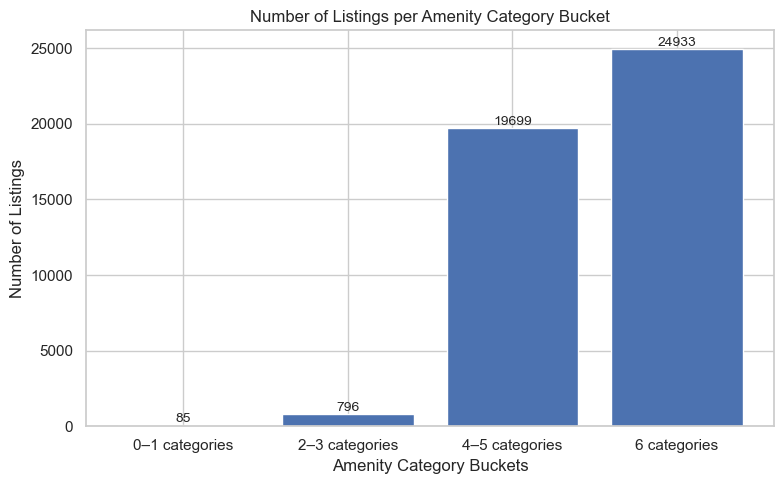

In [231]:
#Create a bar chart to show the number of listings in each of the amenity category.

bucket_counts = (
    amen_df["amenity_cat_bucket"]
    .value_counts()
    .reindex(labels, fill_value=0)
)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(bucket_counts.index.astype(str), bucket_counts.values)

# Add the count above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        str(int(height)),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xlabel("Amenity Category Buckets")
plt.ylabel("Number of Listings")
plt.title("Number of Listings per Amenity Category Bucket")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Analytical Techniques Used

### Boxplot (Data Visualization Technique)

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='amenity_cat_bucket', ylabel='review_scores_rating'>

Text(0.5, 0, 'Number of Amenity Categories Offered')

Text(0, 0.5, 'Review Scores Rating')

Text(0.5, 1.0, 'Review Scores vs. Amenity Category Richness (All Cities Combined)')

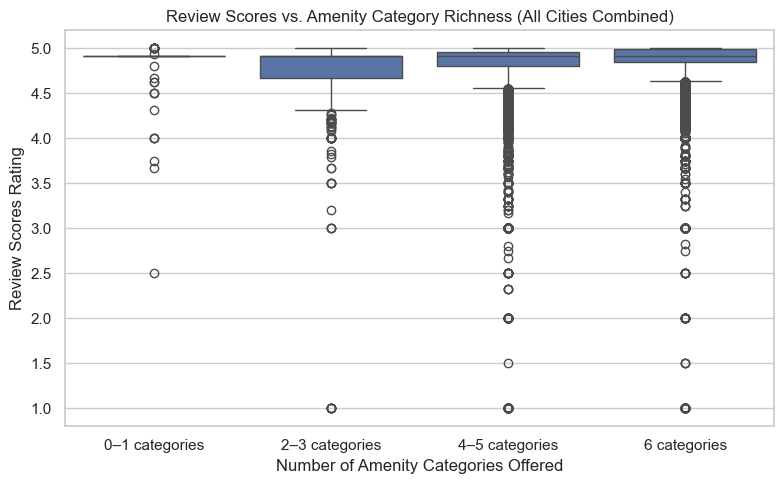

In [232]:
# Generate a boxplot visualization using Seaborn to explore the relationship between amenity category richness and review scores in our datasets.

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=amen_df,
    x="amenity_cat_bucket",
    y="review_scores_rating"
)
plt.xlabel("Number of Amenity Categories Offered")
plt.ylabel("Review Scores Rating")
plt.title("Review Scores vs. Amenity Category Richness (All Cities Combined)")
plt.tight_layout()
plt.show()

### Bubble Plot (Data Visualization Technique)

<ErrorbarContainer object of 3 artists>

Text(0, 4.8345, '40')

Text(1, 4.777333333333333, '45')

Text(2, 4.83858407079646, '113')

Text(3, 4.7263689604685215, '683')

Text(4, 4.769268624781171, '5,141')

Text(5, 4.817054540458855, '14,558')

Text(6, 4.8555320258292225, '24,933')

Text(0, 8, '5.00')

Text(0, 8, '5.00')

Text(0, 8, '5.00')

Text(0, 8, '5.00')

Text(0, 8, '5.00')

Text(0, 8, '5.00')

Text(0, 8, '5.00')

Text(0.5, 0, 'Amenity Category Count (0-6)')

Text(0, 0.5, 'Average Review Score Rating')

Text(0.5, 1.0, 'Impact of Amenity Richness on Ratings: Means, Spread, and Listing Volumes\n(Circles=Mean, Stars=Max, Triangles=Min | Error bars=Std Dev | Size=Reviewed listings | Gray text=Unreviewed)')

(-0.5, 6.5)

(-0.2, 5.2)

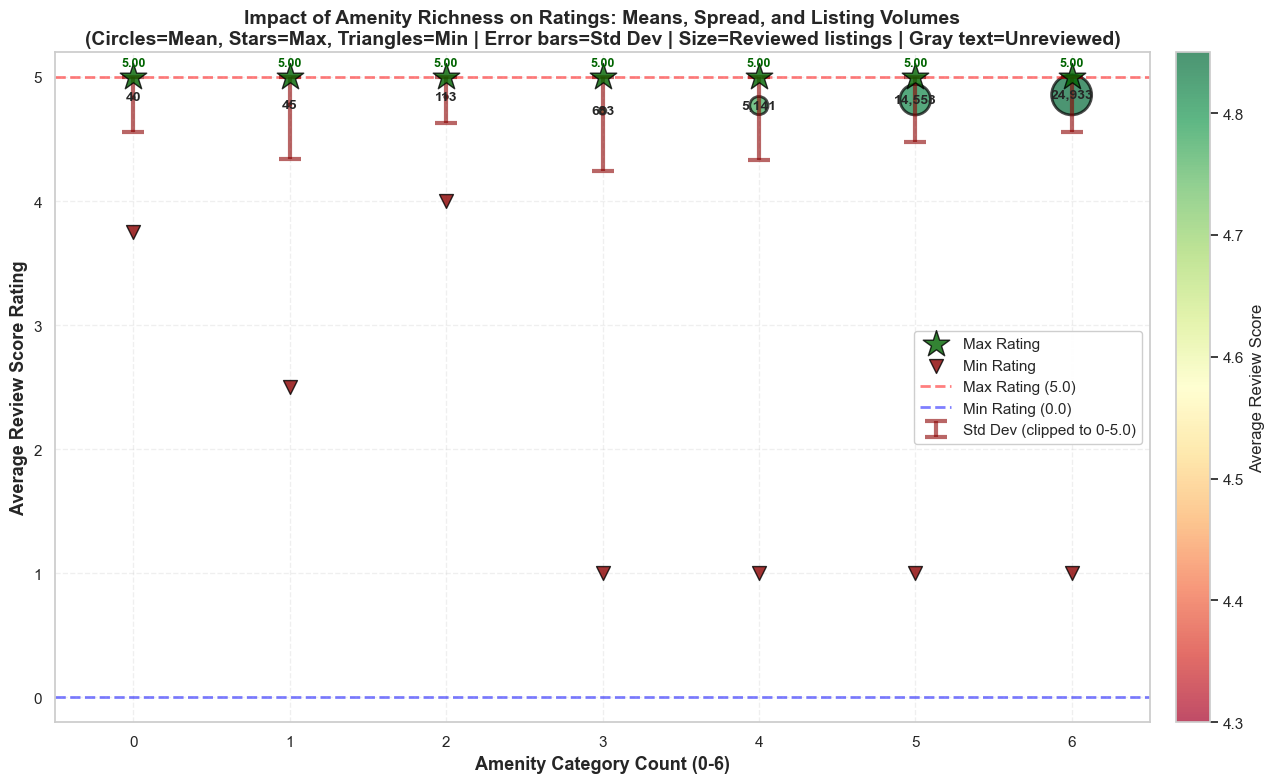

Impact of Amenity Richness on Ratings: Means, Spread, and Listing Volumes (Including Unreviewed Listings)

CIRCLE (center) = Mean average review score for reviewed listings in that amenity category
ERROR BARS = Std Dev range (CLIPPED to valid rating bounds 0.0-5.0)
GREEN STAR = Highest rating in that category
RED TRIANGLE = Lowest rating in that category
CIRCLE SIZE = Number of REVIEWED listings
CIRCLE COLOR = How high the mean rating is (Green=High, Yellow=Medium, Red=Low)
GRAY TEXT = Number of unreviewed (no rating data) listings in that category

Summary Statistics by Amenity Category Count (REVIEWED LISTINGS ONLY):
------------------------------------------------------------------------------------------------------------------------
Cat   Min     Mean     Max     Std      Reviewed     Unreviewed   Total       
------------------------------------------------------------------------------------------------------------------------
0     3.75    4.83     5.00    0.28     40          

In [233]:
# Prepare data for plotting.
plot_data = combined_df.copy()
plot_data['review_scores_rating'] = pd.to_numeric(plot_data['review_scores_rating'], errors='coerce')

# Separate reviewed and unreviewed.
reviewed_data = plot_data.dropna(subset=['review_scores_rating'])
unreviewed_data = plot_data[plot_data['review_scores_rating'].isna()]

# Group reviewed by amenity_category_count and calculate statistics.
grouped = reviewed_data.groupby('amenity_category_count').agg({
    'review_scores_rating': ['mean', 'std', 'min', 'max', 'count'],
    'amenity_category_count': 'first'
}).reset_index(drop=True)

grouped.columns = ['avg_rating', 'std_rating', 'min_rating', 'max_rating', 'reviewed_count', 'amenity_count']

# Count unreviewed by amenity_category_count.
unreviewed_counts = unreviewed_data.groupby('amenity_category_count').size().reset_index(name='unreviewed_count')
unreviewed_counts.columns = ['amenity_count', 'unreviewed_count']

# Merge unreviewed counts into grouped data.
grouped = grouped.merge(unreviewed_counts, on='amenity_count', how='left')
grouped['unreviewed_count'] = grouped['unreviewed_count'].fillna(0).astype(int)

# Extract coordinates.
x = grouped['amenity_count'].values
y = grouped['avg_rating'].values
z = grouped['reviewed_count'].values
std_err = grouped['std_rating'].values
max_ratings = grouped['max_rating'].values
min_ratings = grouped['min_rating'].values
unreviewed = grouped['unreviewed_count'].values

# Calculate error bar bounds clipped to [0, 5.0] range.
lower_bound = np.maximum(y - std_err, 0)
upper_bound = np.minimum(y + std_err, 5.0)

# Asymmetric error bars.
err_lower = y - lower_bound
err_upper = upper_bound - y

# Create 2D scatter plot.
fig, ax = plt.subplots(figsize=(14, 8))

# Create bubble plot.
scatter = ax.scatter(x, y, s=z/30, c=y, cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=2, vmin=4.3, vmax=4.85)

# Add error bars CLIPPED to [0, 5.0] range.
ax.errorbar(x, y, yerr=[err_lower, err_upper], fmt='none', ecolor='darkred', alpha=0.6, capsize=8, capthick=3, linewidth=3, label='Std Dev (clipped to 0-5.0)', zorder=3)

# Add max rating markers.
ax.scatter(x, max_ratings, marker='*', s=400, c='darkgreen', edgecolors='black', linewidth=1, label='Max Rating', zorder=5, alpha=0.8)

# Add min rating markers.
ax.scatter(x, min_ratings, marker='v', s=100, c='darkred', edgecolors='black', linewidth=1, label='Min Rating', zorder=5, alpha=0.8)

# Add reviewed count labels on each bubble.
for xi, yi, zi, std in zip(x, y, z, std_err):
    ax.annotate(f'{int(zi):,}', (xi, yi), fontsize=10, fontweight='bold', ha='center', va='center', zorder=4)

# Add max rating labels.
for xi, max_r in zip(x, max_ratings):
    ax.annotate(f'{max_r:.2f}', (xi, max_r), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=9, fontweight='bold', color='darkgreen', zorder=5)

# Add UNREVIEWED count labels below each bubble (in gray).
for xi, yi, unrev in zip(x, y, unreviewed):
    if unrev > 0:
        ax.annotate(f'Unreviewed: {unrev:,}', (xi, yi), textcoords="offset points", xytext=(0, -18), ha='center', fontsize=8, color='gray', style='italic', zorder=4)

# Customize plot.
ax.set_xlabel('Amenity Category Count (0-6)', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Review Score Rating', fontsize=13, fontweight='bold')
ax.set_title('Impact of Amenity Richness on Ratings: Means, Spread, and Listing Volumes\n(Circles=Mean, Stars=Max, Triangles=Min | Error bars=Std Dev | Size=Reviewed listings | Gray text=Unreviewed)', fontsize=14, fontweight='bold')
ax.set_xlim(-0.5, 6.5)
ax.set_ylim(-0.2, 5.2)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xticks(range(0, 7))
ax.axhline(y=5.0, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Max Rating (5.0)')
ax.axhline(y=0.0, color='blue', linestyle='--', linewidth=2, alpha=0.5, label='Min Rating (0.0)')

# Add colorbar.
colorbar = plt.colorbar(scatter, ax=ax, label='Average Review Score', pad=0.02)

# Add legend inside plot, right side, vertically centered (at score 2.5-ish area, amenity 5.5-ish).
ax.legend(loc='center right', fontsize=11, framealpha=0.95)

plt.tight_layout()
plt.savefig('2d_cluster_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("=" * 120)
print("Impact of Amenity Richness on Ratings: Means, Spread, and Listing Volumes (Including Unreviewed Listings)")
print("=" * 120)
print(f"\nCIRCLE (center) = Mean average review score for reviewed listings in that amenity category")
print(f"ERROR BARS = Std Dev range (CLIPPED to valid rating bounds 0.0-5.0)")
print(f"GREEN STAR = Highest rating in that category")
print(f"RED TRIANGLE = Lowest rating in that category")
print(f"CIRCLE SIZE = Number of REVIEWED listings")
print(f"CIRCLE COLOR = How high the mean rating is (Green=High, Yellow=Medium, Red=Low)")
print(f"GRAY TEXT = Number of unreviewed (no rating data) listings in that category\n")

print("Summary Statistics by Amenity Category Count (REVIEWED LISTINGS ONLY):")
print("-" * 120)
print(f"{'Cat':<5} {'Min':<7} {'Mean':<8} {'Max':<7} {'Std':<8} {'Reviewed':<12} {'Unreviewed':<12} {'Total':<12}")
print("-" * 120)
for i, row in grouped.iterrows():
    total = row['reviewed_count'] + row['unreviewed_count']
    print(f"{int(row['amenity_count']):<5} {row['min_rating']:<7.2f} {row['avg_rating']:<8.2f} {row['max_rating']:<7.2f} {row['std_rating']:<8.2f} {int(row['reviewed_count']):<12,} {int(row['unreviewed_count']):<12,} {int(total):<12,}")

print("-" * 120)
total_reviewed = reviewed_data.shape[0]
total_unreviewed = unreviewed_data.shape[0]
total_all = total_reviewed + total_unreviewed
overall_min = reviewed_data['review_scores_rating'].min()
overall_max = reviewed_data['review_scores_rating'].max()
overall_std = reviewed_data['review_scores_rating'].std()
overall_mean = reviewed_data['review_scores_rating'].mean()
print(f"{'TOTAL':<5} {overall_min:<7.2f} {overall_mean:<8.2f} {overall_max:<7.2f} {overall_std:<8.2f} {int(total_reviewed):<12,} {int(total_unreviewed):<12,} {int(total_all):<12,}")
print("=" * 120)
print(f"\nNote: Unreviewed listings are those with no review_scores_rating data (typically brand-new or inactive listings).")
print(f"Chart only shows statistics for REVIEWED listings, but unreviewed count is displayed for context.")
print("=" * 120)

### Correlation (Statistical Analysis Technique)

In [234]:
# Correlation between the number of amenity categories and review scores rating.

correlation = amen_df["amenity_category_count"].corr(amen_df["review_scores_rating"])
correlation

print(f"Correlation between number of amenity categories and review score rating: {correlation:.3f}")

np.float64(0.08882118794782033)

Correlation between number of amenity categories and review score rating: 0.089


### Mean Differences and T-Test Significance (Statistical Analysis Technique)

In [235]:
# Average ratings with/without each category + t-test significance.

results = []

for col in category_cols:
    with_ratings = amen_df[amen_df[col] == 1]["review_scores_rating"]
    without_ratings = amen_df[amen_df[col] == 0]["review_scores_rating"]

    stat, p_value = ttest_ind(with_ratings, without_ratings, equal_var=False)

    results.append({
        "amenity_category": col,
        "count_with": len(with_ratings),
        "count_without": len(without_ratings),
        "avg_rating_with": with_ratings.mean(),
        "avg_rating_without": without_ratings.mean(),
        "difference": with_ratings.mean() - without_ratings.mean(),
        "p_value": p_value
    })

results_df = pd.DataFrame(results)
results_df

,amenity_category,count_with,count_without,avg_rating_with,avg_rating_without,difference,p_value
0,amenity_comfort,45292,221,4.831622,4.786697,0.044926,1.620802e-01
1,amenity_luxury,35795,9718,4.839329,4.802215,0.037113,2.720436e-20
2,amenity_business,45177,336,4.831774,4.781726,0.050047,3.928185e-02
3,amenity_safety,44432,1081,4.832671,4.779343,0.053328,2.775081e-04
4,amenity_kitchen,44514,999,4.832999,4.760330,0.072669,8.777785e-08
5,amenity_outdoor,30062,15451,4.852483,4.790393,0.062090,2.015398e-65


### Classification Tree (Predictive Modeling Technique)

In [236]:
# Prepare data for classification.
# Goal: Create a binary target variable to predict if a listing is "High Rated' (1) or "Not High Rated" (0).

data_variable_name = combined_df
data_variable_name['is_high_rated'] = np.where(data_variable_name['review_scores_rating'] >= 4.79, 1, 0)

# Define the features (X) and the new binary target variable (Y).
feature_cols = [
    'amenity_comfort',
    'amenity_luxury',
    'amenity_business',
    'amenity_safety',
    'amenity_kitchen',
    'amenity_outdoor',
    'amenity_category_count'
]
X = data_variable_name[feature_cols]
Y = data_variable_name['is_high_rated']

In [237]:
# Split data into training and test sets: 80% for training and 20% for testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [238]:
# Build and train the decision tree model.
dt_model = DecisionTreeClassifier(
    max_depth=3,
    class_weight='balanced',
    random_state=1
)
dt_model.fit(X_train, Y_train)

# Check the model's accuracy.
accuracy = dt_model.score(X_test, Y_test)
print(f"Decision Tree Model Accuracy on Test Data: {accuracy:.4f}")

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=1)

Decision Tree Model Accuracy on Test Data: 0.5637


<Figure size 2000x1200 with 0 Axes>

[Text(0.625, 0.875, 'amenity_category_count <= 5.5\ngini = 0.5\nsamples = 36410\nvalue = [18205.0, 18205.0]\nclass = Not High Rated'),
 Text(0.5, 0.625, 'amenity_category_count <= 4.5\ngini = 0.493\nsamples = 16484\nvalue = [9883.439, 7838.8]\nclass = Not High Rated'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'amenity_luxury <= 0.5\ngini = 0.475\nsamples = 4822\nvalue = [3415.339, 2164.296]\nclass = Not High Rated'),
 Text(0.125, 0.125, 'gini = 0.469\nsamples = 4082\nvalue = [3007.121, 1803.684]\nclass = Not High Rated'),
 Text(0.375, 0.125, 'gini = 0.498\nsamples = 740\nvalue = [408.218, 360.612]\nclass = Not High Rated'),
 Text(0.75, 0.375, 'amenity_kitchen <= 0.5\ngini = 0.498\nsamples = 11662\nvalue = [6468.1, 5674.504]\nclass = Not High Rated'),
 Text(0.625, 0.125, 'gini = 0.476\nsamples = 88\nvalue = [30.426, 47.334]\nclass = High Rated'),
 Text(0.875, 0.125, 'gini = 0.498\nsamples = 11574\nvalue = [6437.673, 5627.17]\nclass = Not High Rated'),
 Text(0.75, 0.625, 'gini =

Text(0.5, 1.0, 'Decision Tree for High Rated vs. Not High Rated Airbnb Listings')

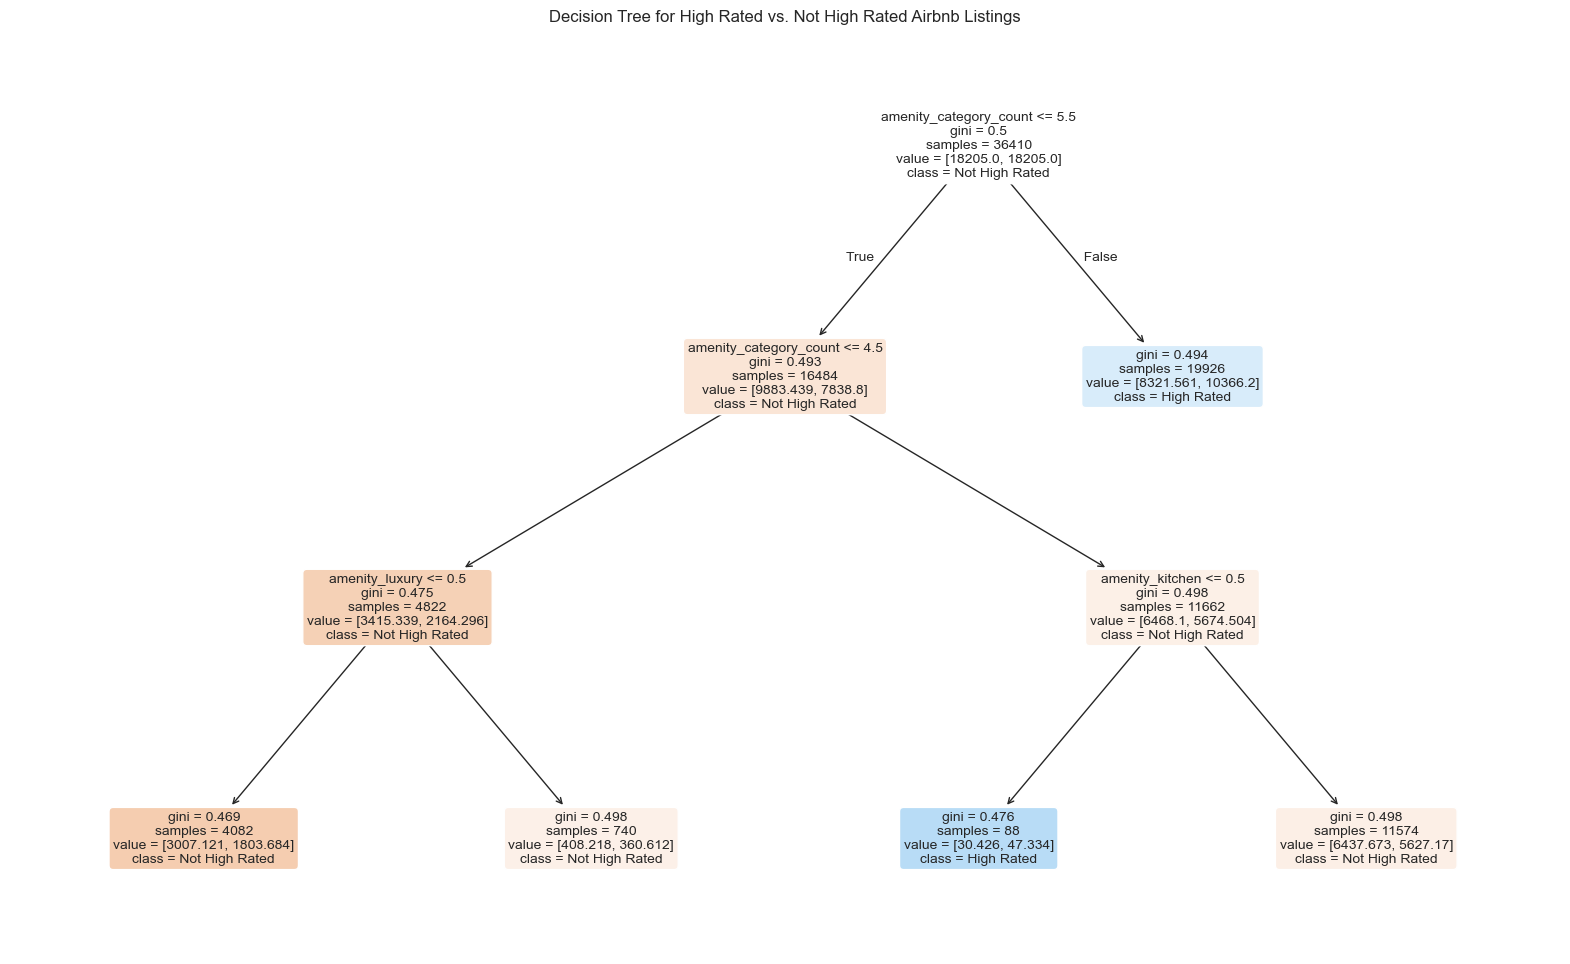

In [239]:
dt_feature_names = list(X.columns)
dt_target_names = ['Not High Rated', 'High Rated']

# Plot the decision tree.
plt.figure(figsize=(20, 12))
plot_tree(dt_model,
          feature_names=dt_feature_names,
          class_names=dt_target_names,
          filled=True,
          fontsize=10,
          rounded=True,
          impurity=True)
plt.title("Decision Tree for High Rated vs. Not High Rated Airbnb Listings")
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

## <b>Hypothesis 2 Conclusion: Findings and Managerial Insights

Our analysis validates that listings with a richer mix of amenities generally receive higher review scores. Therefore, based on our analysis, we rejected the null hypothesis.

***
**Validity of the Finding**

To test whether more amenities are associated with higher guest satisfaction, we:

**Descriptive Analysis (Initial Finding):**
1. **Grouped amenities into 6 categories**: comfort, luxury, business/work, safety, kitchen essentials, and outdoor amenities.
2. **Created a variable** `amenity_category_count` (0–6) for each listing, indicating how many of these categories it offers.
3. **Bucketed listings** into four groups based on amenity richness:
   - 0–1 categories  
   - 2–3 categories  
   - 4–5 categories
   - 6 categories

Across all five cities combined, listings with **6 amenity categories** have the highest average review scores, while listings with **0–1 categories** have the lowest. The boxplot shows an upward shift in the distribution of review scores as amenity richness increases. The correlation between `amenity_category_count` and `review_scores_rating` is positive, **supporting the general relationship** that more amenities correlate with higher scores.

**Predictive Analysis (Classification Tree):**
1. To refine the correlation, we trained a **Decision Tree Classifier** to model the exact conditions required for a listing to be **classified as "High Rated"** ($\ge 4.79$).
2. The classification tree **validated and specified** the initial finding by showing that the **`amenity_outdoor`** category is the single strongest predictive feature (the root node).
3. **Safety and Business Also Boost Ratings:** For listings that successfully meet the Outdoor requirement, including the Safety and Business Amenities categories ensure being classified as "High Rated" (with a predictability score of ~59% in the final node).
  
***
**Managerial Insights**

This analysis suggests that guests reward listings that offer a broader range of amenities with higher review scores. For Airbnb and its hosts, this has two main implications:

1. **Host Recommendations:** Airbnb can encourage hosts to invest in high-impact amenity categories (comfort, kitchen essentials, and business/work amenities) by:
    * Providing checklists during listing creation.
    * Highlighting missing “must-have” amenities on the host dashboard.
2. **Product & Search Experience:** Airbnb can:
    * Boost the visibility of listings that offer richer amenity bundles in search results.
    * Surface filters that help guests find listings with multiple amenity categories (e.g., “Great for remote work”, “Fully equipped kitchen”).

By nudging hosts to expand their amenity offerings, Airbnb can improve guest experience and satisfaction scores, which are likely to translate into more bookings and repeat stays across these West Coast markets.

# **Testing Hypothesis 3: Relationship between property types with estimated revenue/bookings/reviews**

**Key question:** Which property type works best for each of the 5 West Coast cities?

* **H₀ (Null Hypothesis):** There is no significant difference in guest preference among different property types across cities.

* **H1 (Alternative Hypothesis):** Guests prefer certain property types (e.g., private homes) over others, and the most popular property type varies across cities.



## Data Setup for Hypothesis

In [240]:
def analyze_city_performance(df):
  print("EXPLORATORY ANALYSIS PER CITY")

  cities = df['City'].unique()

  summary_report = []
  for city in cities:
    city_df = df[df['City'] == city]
    type_counts = city_df['property_group'].value_counts()
    revenue_rank = city_df.groupby('property_group')['estimated_revenue_l365d'].median().sort_values(ascending=False)
    top_earner = revenue_rank.index[0]
    top_earner_revenue = revenue_rank.iloc[0]

    print(f"\n--- {city} ---")
    print(f"Total Listings: {len(city_df)}")
    print(f"Most Common Type: {type_counts.index[0]} ({type_counts.iloc[0]} listings)")
    print(f"Highest Grossing Type: {top_earner} (${top_earner_revenue:,.0f} median)")

    summary_report.append({
        'City': city,
        'Total_Earner_Type': top_earner,
        'Top_Earner_Revenue': top_earner_revenue
        })

  summary_df = pd.DataFrame(summary_report)
  return summary_df

summary_df = analyze_city_performance(combined_df)
summary_df

EXPLORATORY ANALYSIS PER CITY

--- LA ---
Total Listings: 18089
Most Common Type: Entire home (5401 listings)
Highest Grossing Type: Entire guest suite ($14,235 median)

--- SD ---
Total Listings: 11604
Most Common Type: Entire home (4138 listings)
Highest Grossing Type: Entire home ($28,800 median)

--- SF ---
Total Listings: 5795
Most Common Type: Entire rental unit (1587 listings)
Highest Grossing Type: Entire guest suite ($33,405 median)

--- Seattle ---
Total Listings: 6227
Most Common Type: Entire home (1646 listings)
Highest Grossing Type: Entire townhouse ($32,604 median)

--- Portland ---
Total Listings: 3798
Most Common Type: Entire home (1163 listings)
Highest Grossing Type: Entire guesthouse ($17,880 median)


,City,Total_Earner_Type,Top_Earner_Revenue
0,LA,Entire guest suite,14235.0
1,SD,Entire home,28800.0
2,SF,Entire guest suite,33405.0
3,Seattle,Entire townhouse,32604.0
4,Portland,Entire guesthouse,17880.0


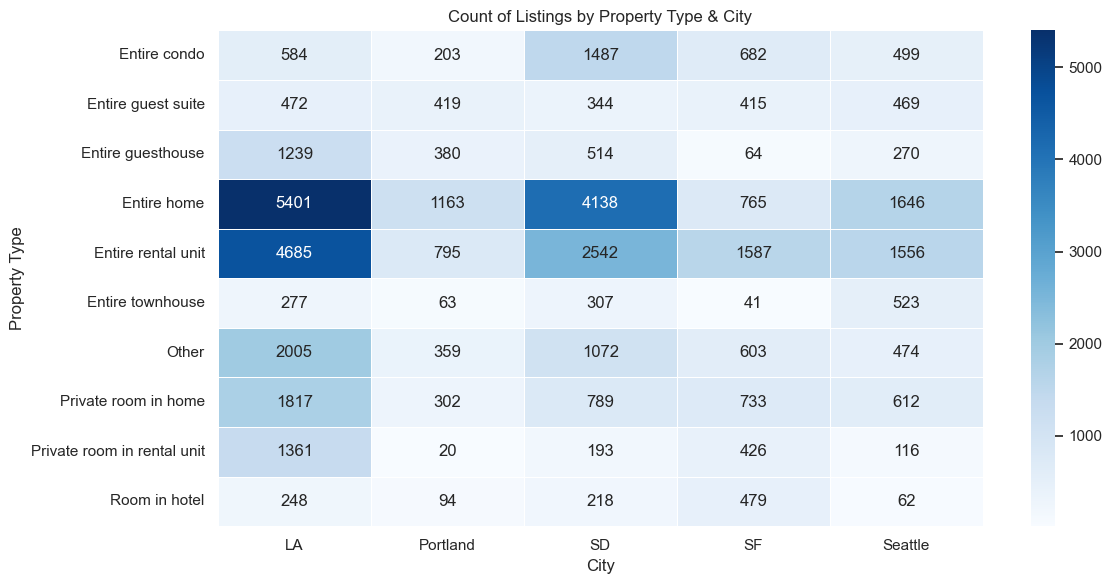

/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/514377967.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


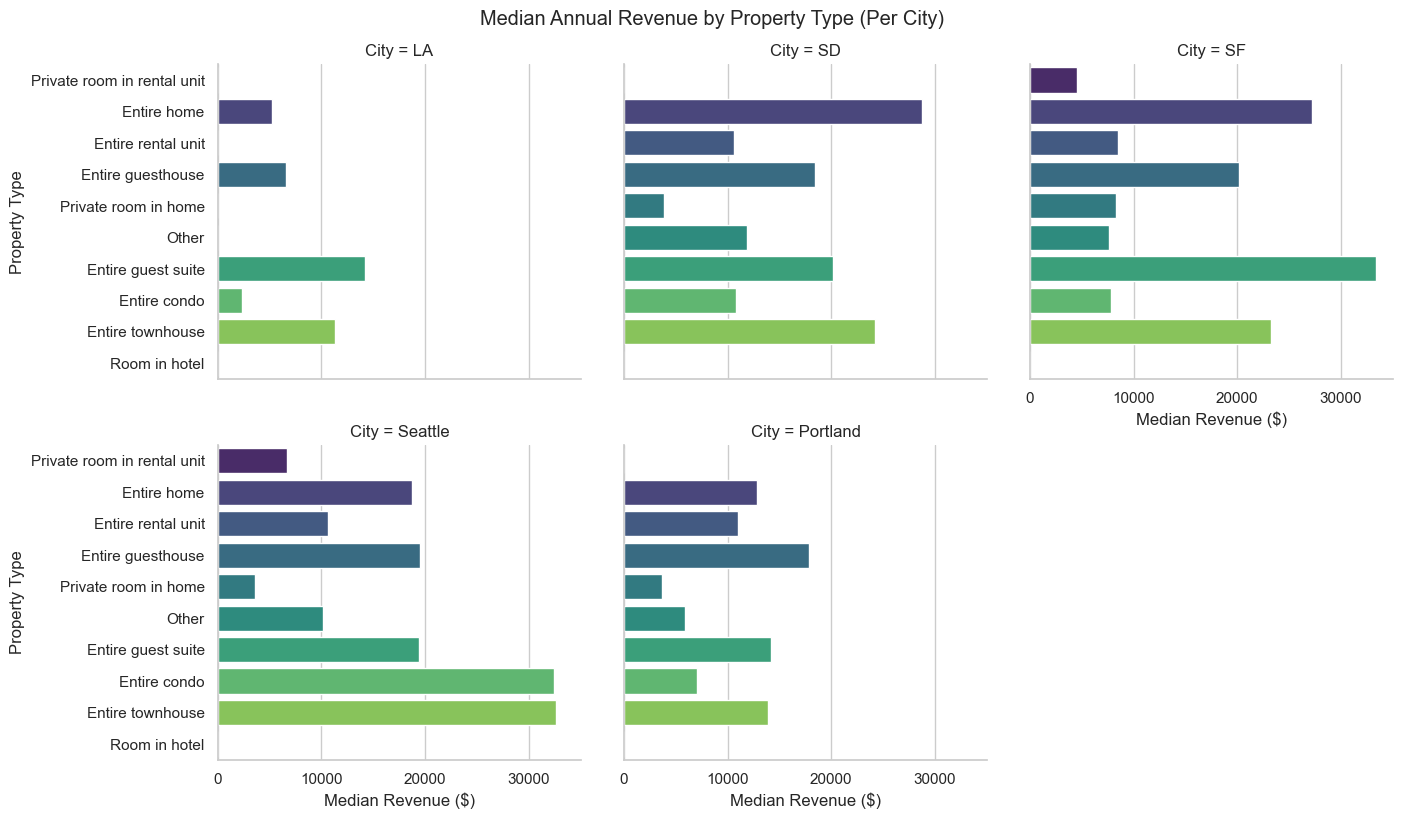

/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/514377967.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='City', y='estimated_revenue_l365d', order=order, palette="Set3", showfliers=False)


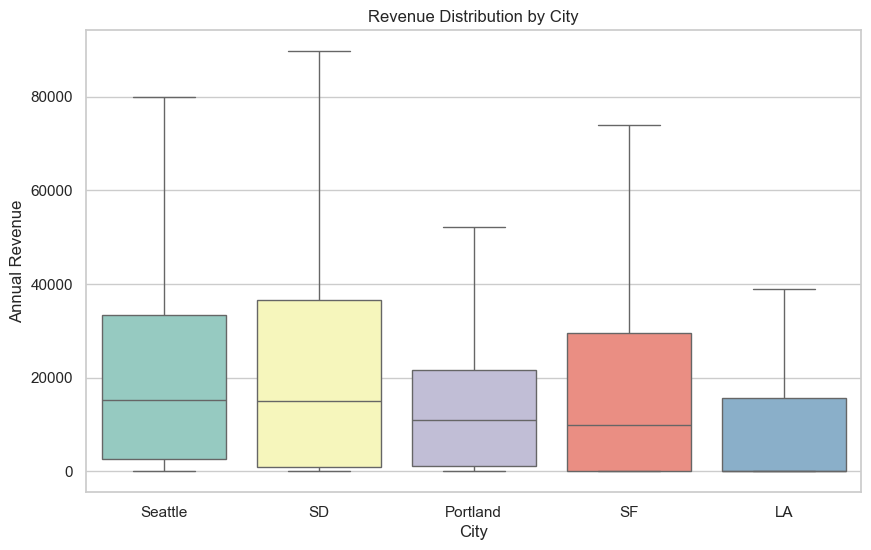

In [241]:
def create_multi_city_visualizations(df):
    """
    Generates visualizations comparing cities and property types.
    """
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(12, 6))
    pivot_counts = df.pivot_table(index='property_group', columns='City', aggfunc='size', fill_value=0)
    sns.heatmap(pivot_counts, annot=True, fmt='d', cmap='Blues', linewidths=.5)
    plt.title('Count of Listings by Property Type & City')
    plt.ylabel('Property Type')
    plt.xlabel('City')
    plt.tight_layout()
    plt.show()

    g = sns.catplot(
        data=df,
        x='estimated_revenue_l365d',
        y='property_group',
        col='City',
        col_wrap=3,
        kind='bar',
        estimator=np.median,
        errorbar=None,
        palette='viridis',
        height=4,
        aspect=1.2
    )
    g.fig.suptitle('Median Annual Revenue by Property Type (Per City)', y=1.02)
    g.set_axis_labels("Median Revenue ($)", "Property Type")
    plt.show()

    plt.figure(figsize=(10, 6))
    order = df.groupby('City')['estimated_revenue_l365d'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x='City', y='estimated_revenue_l365d', order=order, palette="Set3", showfliers=False)
    plt.title('Revenue Distribution by City')
    plt.ylabel('Annual Revenue')
    plt.show()

create_multi_city_visualizations(combined_df)

This analysis is based on three viz above.

1. High-Level Findings (Executive Summary)

* **Quantity vs. Quality:** **Los Angeles (LA)** dominates the market in total listing volume, but **Seattle** and **San Diego (SD)** offer significantly higher median revenues and better per-listing earning potential.
* **Top Performers:** Niche property types like **"Entire Townhouse" (Seattle)** and **"Entire Guest Suite" (San Francisco)** yield the highest median annual revenue in their respective cities.

---

2. Market Supply & Volume (Heatmap)

| City | Most Common Property Type | Key Takeaway |
| :--- | :--- | :--- |
| **LA** | Entire Home (5,401 listings) | **Highest Volume:** The largest and most saturated market by far. |
| **SD** | Entire Home (4,138 listings) | **Strong Second:** High volume, suggesting a market driven by vacation homes. |
| **All Cities** | Entire Home / Entire Rental Unit | These are the universal backbone of the Airbnb supply. |

---

3. Revenue Distribution & Risk (Boxplot)

The boxplot shows the distribution after removing extreme outliers (> 1 million) to focus on the typical market up to approximately $80,000.

* **Best Earning Potential:** **SD** and **Seattle** have the highest upper fences and medians, demonstrating the best potential for high returns.
* **Highest Variability:** **San Diego (SD)** shows the widest interquartile range (the largest box), indicating high variance in host success—high risk, but high reward.
* **Crowded Market Effect:** The compressed box and low median in **LA** suggests high competition is driving down the typical revenue for individual listings.
* **Stability:** **Portland** is the most stable market, with lower variability but also a lower earning ceiling.

---

4. Property-Specific Performance (Facet Grid)

Analysis of the median annual revenue for each property type:

| City | Top Performing Property Type | Median Revenue Estimate |
| :--- | :--- | :--- |
| **Seattle** | Entire Townhouse / Entire Condo | > $30,000 |
| **San Francisco** | Entire Guest Suite | > $30,000 |
| **San Diego** | Entire Townhouse / Entire Guest Suite | ~ $25,000 - $30,000 |
| **LA / Portland** | Generally lower across the board | Most categories < $20,000 |

Key Property Takeaways:
1.  **Niche Advantage:** High-density niche properties (Townhouses, Condos, Guest Suites) often deliver **higher median returns** than the standard "Entire Home" in major cities like Seattle and SF.
2.  **Low Performers:** **Private rooms** (in homes or rental units) are consistently the lowest-earning categories across all markets.

In [242]:
# Run Anova Test
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

def run_statistical_tests(df):
  """
  Runs ANOVA tests to check for statistical significance.
  1. Does City affect Revenue?
  2. Does Property Type affect Revenue (within each city)?
  """
  print("\n" + "="*50)
  print("STATISTICAL ANALYSIS (ANOVA)")
  print("="*50)

  # TEST 1: City vs Revenue
  groups = [group['estimated_revenue_l365d'].values for name, group in df.groupby('City')]
  f_stat, p_val = stats.f_oneway(*groups)
  print(f"\n[Global Test] Does City affect Revenue?")
  print(f"F-Stat: {f_stat:.2f} | P-Value: {p_val:.4e}")
  if p_val < 0.05:
      print("--> YES. Location is a significant driver of revenue.")
  else:
      print("--> NO. Revenue is similar across cities.")

  # TEST 2: Property Type vs Revenue (Per City)
  print(f"\n[Local Tests] Does PROPERTY TYPE affect Revenue within each city?")
  cities = df['City'].unique()
  for city in cities:
      city_df = df[df['City'] == city]
      groups = [group['estimated_revenue_l365d'].values for name, group in city_df.groupby('property_group')]

      # Need at least 2 groups to run ANOVA
      if len(groups) < 2:
          print(f"[City: {city}]: Not enough data groups.")
          continue

      f_stat, p_val = stats.f_oneway(*groups)
      sig = "Significant" if p_val < 0.05 else "Not Significant"
      print(f"[City: {city}]: P-Value: {p_val:.4f} ({sig})")

run_statistical_tests(combined_df)


STATISTICAL ANALYSIS (ANOVA)

[Global Test] Does City affect Revenue?
F-Stat: 115.30 | P-Value: 5.1546e-98
--> YES. Location is a significant driver of revenue.

[Local Tests] Does PROPERTY TYPE affect Revenue within each city?
[City: LA]: P-Value: 0.0000 (Significant)
[City: SD]: P-Value: 0.0000 (Significant)
[City: SF]: P-Value: 0.0000 (Significant)
[City: Seattle]: P-Value: 0.0000 (Significant)
[City: Portland]: P-Value: 0.0001 (Significant)


## Analytical Techniques Used

### ANOVA (Statistical Analysis Technique)

The Analysis of Variance (**ANOVA**) tests were executed to assess the statistical significance of **City (Location)** and **Property Type** as predictors of estimated revenue.

---

#### 1. Global Test: Does City Affect Revenue?

The results strongly indicate that **City (Location)** is a highly significant, global driver of estimated revenue.

| Statistic | Value | Conclusion |
| :--- | :--- | :--- |
| **F-Stat** | 115.30 | |
| **P-Value** | $5.1546 \times 10^{-98}$ | **P-Value** $\ll 0.05$ |

**Outcome:**
* **YES.** Location is a significant driver of revenue.
* The P-Value is extremely close to zero, providing overwhelming evidence to **reject the null hypothesis**. This confirms that the **average estimated revenue is significantly different across cities**.

---

#### 2. Local Tests: Does Property Type Affect Revenue (Within Each City)?

The local tests confirm that **Property Type** is a significant factor in explaining revenue differences *within* every specific city analyzed.

| City | P-Value | Significance |
| :--- | :--- | :--- |
| **LA** | 0.0000 | Significant |
| **SD** | 0.0000 | Significant |
| **SF** | 0.0000 | Significant |
| **Seattle** | 0.0000 | Significant |
| **Portland** | 0.0001 | Significant |

**Outcome:**
* For all cities tested, the P-Value is $\le 0.0001$, which is far less than the common significance level ($\alpha = 0.05$).
* We **reject the null hypothesis** for all local tests, confirming that the **Property Type significantly affects the estimated revenue** within each market.

---

#### Overall Summary

The statistical analysis clearly establishes the influence of key factors on revenue:

1.  **City (Location)** is a powerful **global** driver of revenue differentiation.
2.  **Property Type** is a crucial, significant driver of revenue **within each specific city market**.

Both factors are statistically important and should be included in any predictive modeling (e.g., the Random Forest model) for maximum accuracy.

### Random Forest (Predictive Modeling Technique)


MACHINE LEARNING (Random Forest)

[Model Accuracy (R^2)]: 0.8553
[Mean Absolute Error (MAE)]: 10730.99


/var/folders/27/_f6hyfmx7dqgqdb7945cqqvr0000gn/T/ipykernel_88879/1093505236.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(15), x='importance', y='feature', palette='magma')


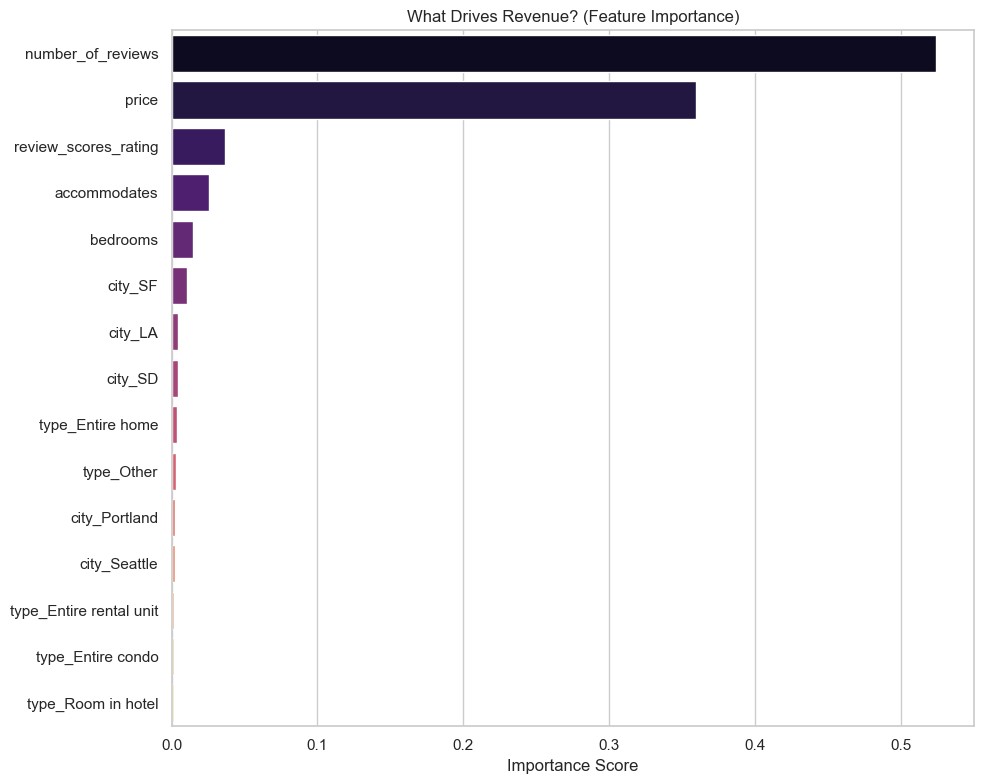

In [243]:
def train_revenue_model(df):
    """
    Trains a Random Forest to see Feature Importance including CITY.
    """
    print("\n" + "="*50)
    print("MACHINE LEARNING (Random Forest)")
    print("="*50)

    features = ['accommodates', 'bedrooms', 'number_of_reviews', 'review_scores_rating', 'price']
    target = 'estimated_revenue_l365d'

    # One-Hot Encoding for Property Type And City
    X = df[features].copy()

    # Encode 'property_group'
    X = pd.concat([X, pd.get_dummies(df['property_group'], prefix='type')], axis=1)

    # Encode 'City' (City)
    X = pd.concat([X, pd.get_dummies(df['City'], prefix='city')], axis=1)

    y = df[target]

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Training
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Evaluation
    score = r2_score(y_test, rf.predict(X_test))
    mae = mean_absolute_error(y_test, rf.predict(X_test))

    print(f"\n[Model Accuracy (R^2)]: {score:.4f}")
    print(f"[Mean Absolute Error (MAE)]: {mae:.2f}")

    # Feature Importance
    importances = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    })
    importances = importances.sort_values(by='importance', ascending=False)

    # Visualization: Feature Importance
    plt.figure(figsize=(10, 8))

    # Top 15 features
    sns.barplot(data=importances.head(15), x='importance', y='feature', palette='magma')
    plt.title('What Drives Revenue? (Feature Importance)')
    plt.xlabel('Importance Score')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

    return importances

feat_imp = train_revenue_model(combined_df)

A Random Forest Regressor model was trained to predict the estimated revenue (`estimated_revenue_1365d`) based on various listing characteristics, property types, and city locations.

---

#### Model Performance

The model achieved high accuracy on the test data, indicating it can reliably predict revenue based on the features provided.

| Metric | Result | Interpretation |
| :--- | :--- | :--- |
| **R-squared ($R^2$)** | **0.8557** | This means the model explains **85.57%** of the variance in the estimated revenue. This is a strong fit. |
| **Mean Absolute Error (MAE)** | **10728.87** | On average, the model's revenue prediction is off by **\$10,728.87**. This value should be assessed relative to the typical revenue figures in the dataset. |

---

#### Feature Importance Analysis

The Random Forest model provides an **Importance Score** for each feature, showing its contribution to the final prediction. The results clearly identify the top drivers of estimated revenue:

| Rank | Feature Name | Importance Score | Implication |
| :--- | :--- | :--- | :--- |
| **1** | **number_of_reviews** | $\approx 0.52$ | The **volume of reviews** is, by far, the single most important factor, suggesting strong demand and market presence are key. |
| **2** | **price** | $\approx 0.35$ | The listing's **daily price** is the second most important feature, reflecting its direct impact on total revenue. |
| **3** | **review_scores_rating** | $\approx 0.04$ | **Quality and guest satisfaction** remain significant, though less dominant than volume/price. |
| **4** | **accommodates** | $\approx 0.02$ | **Capacity (number of guests)** is a moderate factor. |
| **5** | **bedrooms** | $\approx 0.01$ | The physical size, represented by bedrooms, has a minor influence. |

#### City and Property Type Impact

* While ANOVA showed that **City** and **Property Type** are statistically significant, their **direct importance score** in the Random Forest model is relatively low.
* This suggests that the model is primarily using the five continuous variables (reviews, price, rating, capacity, bedrooms) to make predictions, and that the city/property type information may be subtly captured through the *differences* in those continuous variables across markets (e.g., higher prices in `city_SF`).

---

#### Conclusion and Managerial Insights

The model is highly successful, with an $R^2$ of **0.8557**. The analysis strongly suggests that for revenue maximization, efforts should focus on factors that drive **Review Volume** and appropriate **Pricing**, followed by maintaining a high **Review Score**.